# Lecture 12: Introduction to Keras

![](https://www.tensorflow.org/images/colab_logo_32px.png)
[Run in colab](https://colab.research.google.com/drive/1UX-aQOoLzt8q1gcGp8FQ3mM1L2qDNMA-)

In [1]:
import datetime
now = datetime.datetime.now()
print("Last executed: " + now.strftime("%Y-%m-%d %H:%M:%S"))

Last executed: 2024-01-10 00:21:01


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os

2024-01-10 00:21:02.204927: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-10 00:21:02.255907: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-10 00:21:02.257546: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2024-01-10 00:21:03.094962: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Overview of Keras

Keras is a high-level API for deep learning.

It supports multiple back end deep learning frameworks.  

While Keras could be used with TensorFlow 1.0, as of TensorFlow 2.0 it is tightly integrated.

<br>

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture12_Images/keras_architecture.png" width="700px" style="display:block; margin:auto"/>

[Credit: Geron]

Keras's API is similar to Facebook's [PyTorch](https://pytorch.org/) library (PyTorch and TensorFlow are the two most popular deep learning libraries).  Both are very similar to the Scikit Learn API.  So learning Keras will be useful if you want to transition to PyTorch.

Plus, Keras considerably simplifies the use of TensorFlow!

## Sequential API

Keras supports a number of different APIs.

We'll start by considering the *Sequential API*, which is the simplest and simply considers a stack of layers connected sequentially.

### Loading data

We'll using the fashion MNIST dataset to illustrate the use of Keras.

Keras includes support to load a number of popular datasets in `keras.datasets`.

Let's use Keras to load fashion MNIST (note that the dataset already includes standard training and test sets).

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

 8192/29515 [=======>......................] - ETA: 0s

29515/29515 [==============================] - 0s 0us/step


    8192/26421880 [..............................] - ETA: 0s

  466944/26421880 [..............................] - ETA: 2s

 4202496/26421880 [===>..........................] - ETA: 0s

11526144/26421880 [============>.................] - ETA: 0s

18325504/26421880 [===================>..........] - ETA: 0s

26421880/26421880 [==============================] - 0s 0us/step


5148/5148 [==============================] - 0s 0us/step


   8192/4422102 [..............................] - ETA: 0s

 352256/4422102 [=>............................] - ETA: 0s

4422102/4422102 [==============================] - 0s 0us/step


The training set contains 60,000 grayscale images, each 28x28 pixels (similar to the MNIST digit dataset):

In [4]:
X_train_full.shape

(60000, 28, 28)

Since no validation set is provided, we'll split the full training set into a validation set and a (smaller) training set.

Let's split the full training set into a validation set and a (smaller) training set (also scale the pixel intensities from 0-255 to 0-1). 

In [5]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

Plot individual data instance:

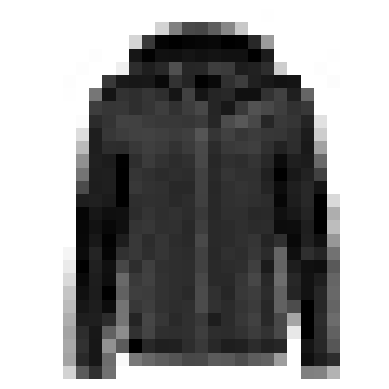

In [6]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [7]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

With corresponding class names:

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [9]:
X_valid.shape

(5000, 28, 28)

In [10]:
X_test.shape

(10000, 28, 28)

Plot a sample of the images in the dataset:

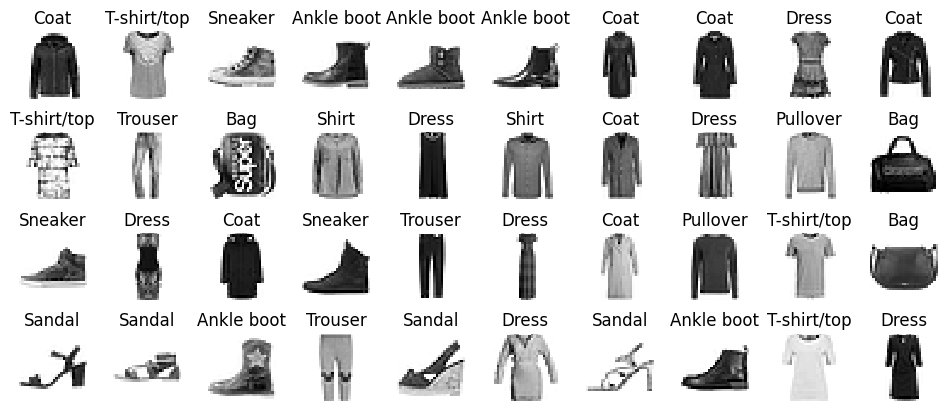

In [11]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### Building the model

Let's build a multi-layer perceptron (MLP) with two hidden layers:

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28])) # flatten 2d array to 1d
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax")) # there are 10 classes in total, hence 1 ouptut for each class. Since this is classification problem, use softmax to calculate the probability

Setting up the sequential model consists of the following steps.

1. Set up a sequential model and then we will sequentially add layers to it.
2. Flatten the 28x28 pixel image into a 1D vector.  Since it is the first layer, should specify input shape.
3. Add a fully connected dense layer with 300 neurons, including a ReLU activation function.
4. Add another fully connected dense layer with 100 neurons, including a ReLU.
5. Add a final dense layer with 10 neurons so we have one per output class, and include a softmax activation function convert to class probabilities.

Alternatively, the sequential model may be specificed by a list of layers.

In [13]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

Can get a summary of the model using the `summary` method.

In [14]:
model.summary()

Model: "sequential_1"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 flatten_1 (Flatten)         (None, 784)               0         


 dense_3 (Dense)             (None, 300)               235500    


 dense_4 (Dense)             (None, 100)               30100     


 dense_5 (Dense)             (None, 10)                1010      


Total params: 266610 (1.02 MB)


Trainable params: 266610 (1.02 MB)


Non-trainable params: 0 (0.00 Byte)


_________________________________________________________________


Can extract list of layers from `model.layers`.

In [15]:
model.layers

### Compiling the model

Once the model is created we still need to specify the loss function and the optimizer to use to train the model.  This is set by *compiling* the model.

In [16]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.legacy.SGD(learning_rate=1e-4),
              metrics=["accuracy"])

Since we have a classification problem we will use a categorical cross-entropy loss, with a stochastic gradient descent optimiser.

We will also specify an extra metric to compute during training and evlaution, in this case the accuracy.

You can find further details regarding Keras loss functions, optimisers and metrics in the Keras API.
- [Keras loss functions](https://keras.io/api/losses/)
- [Keras optimisers](https://keras.io/api/optimizers/)
- [Keras metrics](https://keras.io/api/metrics/)

### Fitting the model

Call `model.fit` to fit the model, given training and validation data and number of epochs.

The loss and extra metrics will be evaluated on the validation data at the end of each epoch.

In [17]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10


   1/1719 [..............................] - ETA: 9:17 - loss: 2.2598 - accuracy: 0.0938

  28/1719 [..............................] - ETA: 3s - loss: 2.2947 - accuracy: 0.0960  

  58/1719 [>.............................] - ETA: 2s - loss: 2.2928 - accuracy: 0.0916

  88/1719 [>.............................] - ETA: 2s - loss: 2.2877 - accuracy: 0.0969

 115/1719 [=>............................] - ETA: 2s - loss: 2.2911 - accuracy: 0.0962

 144/1719 [=>............................] - ETA: 2s - loss: 2.2888 - accuracy: 0.0983

 172/1719 [==>...........................] - ETA: 2s - loss: 2.2868 - accuracy: 0.1003

 200/1719 [==>...........................] - ETA: 2s - loss: 2.2821 - accuracy: 0.1031

 229/1719 [==>...........................] - ETA: 2s - loss: 2.2782 - accuracy: 0.1043

 258/1719 [===>..........................] - ETA: 2s - loss: 2.2755 - accuracy: 0.1070

 284/1719 [===>..........................] - ETA: 2s - loss: 2.2733 - accuracy: 0.1070

 315/1719 [====>.........................] - ETA: 2s - loss: 2.2702 - accuracy: 0.1075

 345/1719 [=====>........................] - ETA: 2s - loss: 2.2675 - accuracy: 0.1091

 376/1719 [=====>........................] - ETA: 2s - loss: 2.2651 - accuracy: 0.1096

 408/1719 [======>.......................] - ETA: 2s - loss: 2.2623 - accuracy: 0.1121

 440/1719 [======>.......................] - ETA: 2s - loss: 2.2597 - accuracy: 0.1131

 471/1719 [=======>......................] - ETA: 2s - loss: 2.2573 - accuracy: 0.1142

 502/1719 [=======>......................] - ETA: 2s - loss: 2.2543 - accuracy: 0.1172

 533/1719 [========>.....................] - ETA: 2s - loss: 2.2522 - accuracy: 0.1186

 559/1719 [========>.....................] - ETA: 1s - loss: 2.2494 - accuracy: 0.1203

 583/1719 [=========>....................] - ETA: 1s - loss: 2.2475 - accuracy: 0.1216

 613/1719 [=========>....................] - ETA: 1s - loss: 2.2447 - accuracy: 0.1240

 641/1719 [==========>...................] - ETA: 1s - loss: 2.2424 - accuracy: 0.1250

 672/1719 [==========>...................] - ETA: 1s - loss: 2.2403 - accuracy: 0.1263

 699/1719 [===========>..................] - ETA: 1s - loss: 2.2379 - accuracy: 0.1285

 727/1719 [===========>..................] - ETA: 1s - loss: 2.2357 - accuracy: 0.1305

 752/1719 [============>.................] - ETA: 1s - loss: 2.2335 - accuracy: 0.1324

 783/1719 [============>.................] - ETA: 1s - loss: 2.2314 - accuracy: 0.1339

 812/1719 [=============>................] - ETA: 1s - loss: 2.2290 - accuracy: 0.1354

 841/1719 [=============>................] - ETA: 1s - loss: 2.2264 - accuracy: 0.1370

 869/1719 [==============>...............] - ETA: 1s - loss: 2.2242 - accuracy: 0.1387

 901/1719 [==============>...............] - ETA: 1s - loss: 2.2217 - accuracy: 0.1406

 930/1719 [===============>..............] - ETA: 1s - loss: 2.2194 - accuracy: 0.1423

 958/1719 [===============>..............] - ETA: 1s - loss: 2.2171 - accuracy: 0.1444

 989/1719 [================>.............] - ETA: 1s - loss: 2.2145 - accuracy: 0.1466

1016/1719 [================>.............] - ETA: 1s - loss: 2.2123 - accuracy: 0.1481

1047/1719 [=================>............] - ETA: 1s - loss: 2.2100 - accuracy: 0.1495

1075/1719 [=================>............] - ETA: 1s - loss: 2.2076 - accuracy: 0.1514

1106/1719 [==================>...........] - ETA: 1s - loss: 2.2053 - accuracy: 0.1535

1136/1719 [==================>...........] - ETA: 1s - loss: 2.2031 - accuracy: 0.1554

1162/1719 [===================>..........] - ETA: 0s - loss: 2.2012 - accuracy: 0.1572

1193/1719 [===================>..........] - ETA: 0s - loss: 2.1987 - accuracy: 0.1588

1222/1719 [====================>.........] - ETA: 0s - loss: 2.1967 - accuracy: 0.1607

1253/1719 [====================>.........] - ETA: 0s - loss: 2.1943 - accuracy: 0.1629

1282/1719 [=====================>........] - ETA: 0s - loss: 2.1922 - accuracy: 0.1643

1311/1719 [=====================>........] - ETA: 0s - loss: 2.1899 - accuracy: 0.1662

1341/1719 [======================>.......] - ETA: 0s - loss: 2.1880 - accuracy: 0.1675

1369/1719 [======================>.......] - ETA: 0s - loss: 2.1860 - accuracy: 0.1696

1400/1719 [=======================>......] - ETA: 0s - loss: 2.1834 - accuracy: 0.1717

1431/1719 [=======================>......] - ETA: 0s - loss: 2.1812 - accuracy: 0.1733

1461/1719 [========================>.....] - ETA: 0s - loss: 2.1790 - accuracy: 0.1754

1490/1719 [=========================>....] - ETA: 0s - loss: 2.1770 - accuracy: 0.1773

1522/1719 [=========================>....] - ETA: 0s - loss: 2.1747 - accuracy: 0.1793

1553/1719 [==========================>...] - ETA: 0s - loss: 2.1724 - accuracy: 0.1817

1583/1719 [==========================>...] - ETA: 0s - loss: 2.1702 - accuracy: 0.1834

1612/1719 [===========================>..] - ETA: 0s - loss: 2.1681 - accuracy: 0.1851

1643/1719 [===========================>..] - ETA: 0s - loss: 2.1660 - accuracy: 0.1870

1673/1719 [============================>.] - ETA: 0s - loss: 2.1637 - accuracy: 0.1890

1704/1719 [============================>.] - ETA: 0s - loss: 2.1617 - accuracy: 0.1910

1719/1719 [==============================] - 4s 2ms/step - loss: 2.1606 - accuracy: 0.1917 - val_loss: 2.0359 - val_accuracy: 0.3032


Epoch 2/10


   1/1719 [..............................] - ETA: 6s - loss: 2.0196 - accuracy: 0.2812

  32/1719 [..............................] - ETA: 2s - loss: 2.0405 - accuracy: 0.3008

  61/1719 [>.............................] - ETA: 2s - loss: 2.0425 - accuracy: 0.2930

  90/1719 [>.............................] - ETA: 2s - loss: 2.0375 - accuracy: 0.2944

 118/1719 [=>............................] - ETA: 2s - loss: 2.0366 - accuracy: 0.2953

 148/1719 [=>............................] - ETA: 2s - loss: 2.0351 - accuracy: 0.2979

 178/1719 [==>...........................] - ETA: 2s - loss: 2.0340 - accuracy: 0.3002

 210/1719 [==>...........................] - ETA: 2s - loss: 2.0323 - accuracy: 0.2984

 236/1719 [===>..........................] - ETA: 2s - loss: 2.0312 - accuracy: 0.2995

 264/1719 [===>..........................] - ETA: 2s - loss: 2.0296 - accuracy: 0.3005

 295/1719 [====>.........................] - ETA: 2s - loss: 2.0270 - accuracy: 0.3036

 321/1719 [====>.........................] - ETA: 2s - loss: 2.0263 - accuracy: 0.3039

 346/1719 [=====>........................] - ETA: 2s - loss: 2.0245 - accuracy: 0.3076

 376/1719 [=====>........................] - ETA: 2s - loss: 2.0222 - accuracy: 0.3112

 406/1719 [======>.......................] - ETA: 2s - loss: 2.0197 - accuracy: 0.3142

 433/1719 [======>.......................] - ETA: 2s - loss: 2.0184 - accuracy: 0.3153

 462/1719 [=======>......................] - ETA: 2s - loss: 2.0158 - accuracy: 0.3183

 491/1719 [=======>......................] - ETA: 2s - loss: 2.0141 - accuracy: 0.3202

 524/1719 [========>.....................] - ETA: 2s - loss: 2.0117 - accuracy: 0.3236

 552/1719 [========>.....................] - ETA: 2s - loss: 2.0101 - accuracy: 0.3247

 579/1719 [=========>....................] - ETA: 2s - loss: 2.0081 - accuracy: 0.3267

 609/1719 [=========>....................] - ETA: 1s - loss: 2.0068 - accuracy: 0.3276

 636/1719 [==========>...................] - ETA: 1s - loss: 2.0053 - accuracy: 0.3292

 664/1719 [==========>...................] - ETA: 1s - loss: 2.0027 - accuracy: 0.3330

 693/1719 [===========>..................] - ETA: 1s - loss: 2.0012 - accuracy: 0.3347

 723/1719 [===========>..................] - ETA: 1s - loss: 1.9994 - accuracy: 0.3364

 752/1719 [============>.................] - ETA: 1s - loss: 1.9975 - accuracy: 0.3382

 781/1719 [============>.................] - ETA: 1s - loss: 1.9952 - accuracy: 0.3409

 811/1719 [=============>................] - ETA: 1s - loss: 1.9933 - accuracy: 0.3434

 838/1719 [=============>................] - ETA: 1s - loss: 1.9916 - accuracy: 0.3457

 864/1719 [==============>...............] - ETA: 1s - loss: 1.9898 - accuracy: 0.3477

 895/1719 [==============>...............] - ETA: 1s - loss: 1.9880 - accuracy: 0.3493

 923/1719 [===============>..............] - ETA: 1s - loss: 1.9863 - accuracy: 0.3509

 954/1719 [===============>..............] - ETA: 1s - loss: 1.9848 - accuracy: 0.3523

 984/1719 [================>.............] - ETA: 1s - loss: 1.9827 - accuracy: 0.3541

1015/1719 [================>.............] - ETA: 1s - loss: 1.9808 - accuracy: 0.3560

1043/1719 [=================>............] - ETA: 1s - loss: 1.9788 - accuracy: 0.3577

1071/1719 [=================>............] - ETA: 1s - loss: 1.9772 - accuracy: 0.3597

1098/1719 [==================>...........] - ETA: 1s - loss: 1.9756 - accuracy: 0.3612

1127/1719 [==================>...........] - ETA: 1s - loss: 1.9739 - accuracy: 0.3627

1155/1719 [===================>..........] - ETA: 0s - loss: 1.9722 - accuracy: 0.3642

1186/1719 [===================>..........] - ETA: 0s - loss: 1.9702 - accuracy: 0.3666

1215/1719 [====================>.........] - ETA: 0s - loss: 1.9688 - accuracy: 0.3679

1246/1719 [====================>.........] - ETA: 0s - loss: 1.9671 - accuracy: 0.3691

1275/1719 [=====================>........] - ETA: 0s - loss: 1.9653 - accuracy: 0.3712

1305/1719 [=====================>........] - ETA: 0s - loss: 1.9637 - accuracy: 0.3724

1333/1719 [======================>.......] - ETA: 0s - loss: 1.9615 - accuracy: 0.3748

1358/1719 [======================>.......] - ETA: 0s - loss: 1.9601 - accuracy: 0.3767

1387/1719 [=======================>......] - ETA: 0s - loss: 1.9581 - accuracy: 0.3789

1417/1719 [=======================>......] - ETA: 0s - loss: 1.9566 - accuracy: 0.3801

1447/1719 [========================>.....] - ETA: 0s - loss: 1.9548 - accuracy: 0.3822

1477/1719 [========================>.....] - ETA: 0s - loss: 1.9531 - accuracy: 0.3842

1506/1719 [=========================>....] - ETA: 0s - loss: 1.9513 - accuracy: 0.3861

1536/1719 [=========================>....] - ETA: 0s - loss: 1.9497 - accuracy: 0.3872

1567/1719 [==========================>...] - ETA: 0s - loss: 1.9482 - accuracy: 0.3883

1593/1719 [==========================>...] - ETA: 0s - loss: 1.9467 - accuracy: 0.3898

1625/1719 [===========================>..] - ETA: 0s - loss: 1.9449 - accuracy: 0.3914

1651/1719 [===========================>..] - ETA: 0s - loss: 1.9433 - accuracy: 0.3927

1682/1719 [============================>.] - ETA: 0s - loss: 1.9417 - accuracy: 0.3943

1712/1719 [============================>.] - ETA: 0s - loss: 1.9401 - accuracy: 0.3956

1719/1719 [==============================] - 3s 2ms/step - loss: 1.9397 - accuracy: 0.3959 - val_loss: 1.8297 - val_accuracy: 0.4970


Epoch 3/10


   1/1719 [..............................] - ETA: 4s - loss: 1.8490 - accuracy: 0.5000

  29/1719 [..............................] - ETA: 3s - loss: 1.8330 - accuracy: 0.4784

  57/1719 [..............................] - ETA: 3s - loss: 1.8258 - accuracy: 0.4940

  85/1719 [>.............................] - ETA: 2s - loss: 1.8373 - accuracy: 0.4820

 114/1719 [>.............................] - ETA: 2s - loss: 1.8298 - accuracy: 0.4888

 146/1719 [=>............................] - ETA: 2s - loss: 1.8270 - accuracy: 0.4925

 178/1719 [==>...........................] - ETA: 2s - loss: 1.8263 - accuracy: 0.4942

 209/1719 [==>...........................] - ETA: 2s - loss: 1.8263 - accuracy: 0.4951

 240/1719 [===>..........................] - ETA: 2s - loss: 1.8244 - accuracy: 0.4939

 269/1719 [===>..........................] - ETA: 2s - loss: 1.8245 - accuracy: 0.4935

 298/1719 [====>.........................] - ETA: 2s - loss: 1.8228 - accuracy: 0.4936

 330/1719 [====>.........................] - ETA: 2s - loss: 1.8203 - accuracy: 0.4956

 361/1719 [=====>........................] - ETA: 2s - loss: 1.8192 - accuracy: 0.4958

 391/1719 [=====>........................] - ETA: 2s - loss: 1.8177 - accuracy: 0.4964

 421/1719 [======>.......................] - ETA: 2s - loss: 1.8153 - accuracy: 0.4970

 450/1719 [======>.......................] - ETA: 2s - loss: 1.8138 - accuracy: 0.4976

 480/1719 [=======>......................] - ETA: 2s - loss: 1.8127 - accuracy: 0.4982

 507/1719 [=======>......................] - ETA: 2s - loss: 1.8110 - accuracy: 0.4988

 536/1719 [========>.....................] - ETA: 2s - loss: 1.8090 - accuracy: 0.5007

 568/1719 [========>.....................] - ETA: 1s - loss: 1.8071 - accuracy: 0.5024

 601/1719 [=========>....................] - ETA: 1s - loss: 1.8055 - accuracy: 0.5030

 630/1719 [=========>....................] - ETA: 1s - loss: 1.8031 - accuracy: 0.5051

 663/1719 [==========>...................] - ETA: 1s - loss: 1.8014 - accuracy: 0.5059

 694/1719 [===========>..................] - ETA: 1s - loss: 1.7996 - accuracy: 0.5072

 725/1719 [===========>..................] - ETA: 1s - loss: 1.7975 - accuracy: 0.5084

 755/1719 [============>.................] - ETA: 1s - loss: 1.7959 - accuracy: 0.5101

 786/1719 [============>.................] - ETA: 1s - loss: 1.7942 - accuracy: 0.5113

 816/1719 [=============>................] - ETA: 1s - loss: 1.7929 - accuracy: 0.5121

 843/1719 [=============>................] - ETA: 1s - loss: 1.7921 - accuracy: 0.5126

 873/1719 [==============>...............] - ETA: 1s - loss: 1.7909 - accuracy: 0.5134

 905/1719 [==============>...............] - ETA: 1s - loss: 1.7889 - accuracy: 0.5150

 936/1719 [===============>..............] - ETA: 1s - loss: 1.7872 - accuracy: 0.5162

 966/1719 [===============>..............] - ETA: 1s - loss: 1.7858 - accuracy: 0.5165

 992/1719 [================>.............] - ETA: 1s - loss: 1.7847 - accuracy: 0.5170

1020/1719 [================>.............] - ETA: 1s - loss: 1.7824 - accuracy: 0.5183

1050/1719 [=================>............] - ETA: 1s - loss: 1.7809 - accuracy: 0.5191

1078/1719 [=================>............] - ETA: 1s - loss: 1.7794 - accuracy: 0.5204

1110/1719 [==================>...........] - ETA: 1s - loss: 1.7775 - accuracy: 0.5216

1140/1719 [==================>...........] - ETA: 0s - loss: 1.7763 - accuracy: 0.5225

1171/1719 [===================>..........] - ETA: 0s - loss: 1.7749 - accuracy: 0.5230

1199/1719 [===================>..........] - ETA: 0s - loss: 1.7735 - accuracy: 0.5239

1227/1719 [====================>.........] - ETA: 0s - loss: 1.7722 - accuracy: 0.5239

1253/1719 [====================>.........] - ETA: 0s - loss: 1.7709 - accuracy: 0.5247

1279/1719 [=====================>........] - ETA: 0s - loss: 1.7690 - accuracy: 0.5260

1310/1719 [=====================>........] - ETA: 0s - loss: 1.7676 - accuracy: 0.5265

1340/1719 [======================>.......] - ETA: 0s - loss: 1.7661 - accuracy: 0.5279

1371/1719 [======================>.......] - ETA: 0s - loss: 1.7649 - accuracy: 0.5290

1402/1719 [=======================>......] - ETA: 0s - loss: 1.7634 - accuracy: 0.5297

1432/1719 [=======================>......] - ETA: 0s - loss: 1.7622 - accuracy: 0.5307

1462/1719 [========================>.....] - ETA: 0s - loss: 1.7608 - accuracy: 0.5311

1489/1719 [========================>.....] - ETA: 0s - loss: 1.7595 - accuracy: 0.5317

1519/1719 [=========================>....] - ETA: 0s - loss: 1.7578 - accuracy: 0.5325

1545/1719 [=========================>....] - ETA: 0s - loss: 1.7562 - accuracy: 0.5332

1576/1719 [==========================>...] - ETA: 0s - loss: 1.7547 - accuracy: 0.5337

1607/1719 [===========================>..] - ETA: 0s - loss: 1.7530 - accuracy: 0.5348

1635/1719 [===========================>..] - ETA: 0s - loss: 1.7513 - accuracy: 0.5357

1665/1719 [============================>.] - ETA: 0s - loss: 1.7496 - accuracy: 0.5361

1695/1719 [============================>.] - ETA: 0s - loss: 1.7480 - accuracy: 0.5372

1719/1719 [==============================] - 3s 2ms/step - loss: 1.7468 - accuracy: 0.5376 - val_loss: 1.6438 - val_accuracy: 0.5928


Epoch 4/10


   1/1719 [..............................] - ETA: 5s - loss: 1.5378 - accuracy: 0.6250

  30/1719 [..............................] - ETA: 2s - loss: 1.6332 - accuracy: 0.5990

  58/1719 [>.............................] - ETA: 2s - loss: 1.6395 - accuracy: 0.5889

  87/1719 [>.............................] - ETA: 2s - loss: 1.6387 - accuracy: 0.5938

 118/1719 [=>............................] - ETA: 2s - loss: 1.6419 - accuracy: 0.5821

 144/1719 [=>............................] - ETA: 2s - loss: 1.6431 - accuracy: 0.5836

 176/1719 [==>...........................] - ETA: 2s - loss: 1.6406 - accuracy: 0.5840

 208/1719 [==>...........................] - ETA: 2s - loss: 1.6378 - accuracy: 0.5868

 239/1719 [===>..........................] - ETA: 2s - loss: 1.6374 - accuracy: 0.5901

 269/1719 [===>..........................] - ETA: 2s - loss: 1.6381 - accuracy: 0.5882

 298/1719 [====>.........................] - ETA: 2s - loss: 1.6374 - accuracy: 0.5884

 325/1719 [====>.........................] - ETA: 2s - loss: 1.6359 - accuracy: 0.5894

 355/1719 [=====>........................] - ETA: 2s - loss: 1.6370 - accuracy: 0.5869

 382/1719 [=====>........................] - ETA: 2s - loss: 1.6369 - accuracy: 0.5858

 414/1719 [======>.......................] - ETA: 2s - loss: 1.6367 - accuracy: 0.5866

 443/1719 [======>.......................] - ETA: 2s - loss: 1.6364 - accuracy: 0.5856

 471/1719 [=======>......................] - ETA: 2s - loss: 1.6355 - accuracy: 0.5849

 498/1719 [=======>......................] - ETA: 2s - loss: 1.6344 - accuracy: 0.5841

 528/1719 [========>.....................] - ETA: 2s - loss: 1.6328 - accuracy: 0.5851

 557/1719 [========>.....................] - ETA: 2s - loss: 1.6317 - accuracy: 0.5842

 587/1719 [=========>....................] - ETA: 1s - loss: 1.6302 - accuracy: 0.5833

 616/1719 [=========>....................] - ETA: 1s - loss: 1.6284 - accuracy: 0.5849

 647/1719 [==========>...................] - ETA: 1s - loss: 1.6257 - accuracy: 0.5869

 674/1719 [==========>...................] - ETA: 1s - loss: 1.6248 - accuracy: 0.5872

 704/1719 [===========>..................] - ETA: 1s - loss: 1.6230 - accuracy: 0.5874

 722/1719 [===========>..................] - ETA: 1s - loss: 1.6218 - accuracy: 0.5880

 752/1719 [============>.................] - ETA: 1s - loss: 1.6193 - accuracy: 0.5897

 782/1719 [============>.................] - ETA: 1s - loss: 1.6182 - accuracy: 0.5899

 814/1719 [=============>................] - ETA: 1s - loss: 1.6166 - accuracy: 0.5911

 845/1719 [=============>................] - ETA: 1s - loss: 1.6155 - accuracy: 0.5913

 874/1719 [==============>...............] - ETA: 1s - loss: 1.6140 - accuracy: 0.5921

 902/1719 [==============>...............] - ETA: 1s - loss: 1.6132 - accuracy: 0.5914

 932/1719 [===============>..............] - ETA: 1s - loss: 1.6121 - accuracy: 0.5915

 960/1719 [===============>..............] - ETA: 1s - loss: 1.6112 - accuracy: 0.5919

 992/1719 [================>.............] - ETA: 1s - loss: 1.6091 - accuracy: 0.5933

1020/1719 [================>.............] - ETA: 1s - loss: 1.6074 - accuracy: 0.5936

1051/1719 [=================>............] - ETA: 1s - loss: 1.6061 - accuracy: 0.5938

1079/1719 [=================>............] - ETA: 1s - loss: 1.6044 - accuracy: 0.5945

1106/1719 [==================>...........] - ETA: 1s - loss: 1.6031 - accuracy: 0.5949

1135/1719 [==================>...........] - ETA: 1s - loss: 1.6019 - accuracy: 0.5955

1167/1719 [===================>..........] - ETA: 0s - loss: 1.6007 - accuracy: 0.5960

1199/1719 [===================>..........] - ETA: 0s - loss: 1.5989 - accuracy: 0.5969

1230/1719 [====================>.........] - ETA: 0s - loss: 1.5973 - accuracy: 0.5970

1261/1719 [=====================>........] - ETA: 0s - loss: 1.5958 - accuracy: 0.5973

1291/1719 [=====================>........] - ETA: 0s - loss: 1.5945 - accuracy: 0.5977

1322/1719 [======================>.......] - ETA: 0s - loss: 1.5932 - accuracy: 0.5980

1352/1719 [======================>.......] - ETA: 0s - loss: 1.5918 - accuracy: 0.5985

1380/1719 [=======================>......] - ETA: 0s - loss: 1.5912 - accuracy: 0.5982

1410/1719 [=======================>......] - ETA: 0s - loss: 1.5901 - accuracy: 0.5982

1439/1719 [========================>.....] - ETA: 0s - loss: 1.5893 - accuracy: 0.5984

1466/1719 [========================>.....] - ETA: 0s - loss: 1.5884 - accuracy: 0.5984

1497/1719 [=========================>....] - ETA: 0s - loss: 1.5868 - accuracy: 0.5989

1527/1719 [=========================>....] - ETA: 0s - loss: 1.5852 - accuracy: 0.5993

1555/1719 [==========================>...] - ETA: 0s - loss: 1.5843 - accuracy: 0.5995

1588/1719 [==========================>...] - ETA: 0s - loss: 1.5826 - accuracy: 0.6002

1615/1719 [===========================>..] - ETA: 0s - loss: 1.5810 - accuracy: 0.6009

1639/1719 [===========================>..] - ETA: 0s - loss: 1.5802 - accuracy: 0.6006

1669/1719 [============================>.] - ETA: 0s - loss: 1.5785 - accuracy: 0.6012

1699/1719 [============================>.] - ETA: 0s - loss: 1.5769 - accuracy: 0.6016

1719/1719 [==============================] - 3s 2ms/step - loss: 1.5761 - accuracy: 0.6021 - val_loss: 1.4832 - val_accuracy: 0.6296


Epoch 5/10


   1/1719 [..............................] - ETA: 4s - loss: 1.4024 - accuracy: 0.7500

  31/1719 [..............................] - ETA: 2s - loss: 1.4930 - accuracy: 0.6502

  63/1719 [>.............................] - ETA: 2s - loss: 1.4978 - accuracy: 0.6369

  92/1719 [>.............................] - ETA: 2s - loss: 1.5071 - accuracy: 0.6264

 121/1719 [=>............................] - ETA: 2s - loss: 1.4962 - accuracy: 0.6340

 150/1719 [=>............................] - ETA: 2s - loss: 1.4928 - accuracy: 0.6333

 181/1719 [==>...........................] - ETA: 2s - loss: 1.4940 - accuracy: 0.6286

 212/1719 [==>...........................] - ETA: 2s - loss: 1.4936 - accuracy: 0.6265

 242/1719 [===>..........................] - ETA: 2s - loss: 1.4897 - accuracy: 0.6281

 269/1719 [===>..........................] - ETA: 2s - loss: 1.4871 - accuracy: 0.6287

 298/1719 [====>.........................] - ETA: 2s - loss: 1.4838 - accuracy: 0.6307

 327/1719 [====>.........................] - ETA: 2s - loss: 1.4806 - accuracy: 0.6324

 357/1719 [=====>........................] - ETA: 2s - loss: 1.4813 - accuracy: 0.6308

 385/1719 [=====>........................] - ETA: 2s - loss: 1.4802 - accuracy: 0.6295

 415/1719 [======>.......................] - ETA: 2s - loss: 1.4779 - accuracy: 0.6304

 441/1719 [======>.......................] - ETA: 2s - loss: 1.4770 - accuracy: 0.6305

 472/1719 [=======>......................] - ETA: 2s - loss: 1.4766 - accuracy: 0.6290

 503/1719 [=======>......................] - ETA: 2s - loss: 1.4767 - accuracy: 0.6287

 534/1719 [========>.....................] - ETA: 2s - loss: 1.4750 - accuracy: 0.6293

 564/1719 [========>.....................] - ETA: 1s - loss: 1.4746 - accuracy: 0.6289

 593/1719 [=========>....................] - ETA: 1s - loss: 1.4748 - accuracy: 0.6278

 624/1719 [=========>....................] - ETA: 1s - loss: 1.4739 - accuracy: 0.6272

 651/1719 [==========>...................] - ETA: 1s - loss: 1.4724 - accuracy: 0.6284

 679/1719 [==========>...................] - ETA: 1s - loss: 1.4702 - accuracy: 0.6290

 709/1719 [===========>..................] - ETA: 1s - loss: 1.4691 - accuracy: 0.6289

 739/1719 [===========>..................] - ETA: 1s - loss: 1.4672 - accuracy: 0.6300

 767/1719 [============>.................] - ETA: 1s - loss: 1.4666 - accuracy: 0.6299

 793/1719 [============>.................] - ETA: 1s - loss: 1.4651 - accuracy: 0.6304

 822/1719 [=============>................] - ETA: 1s - loss: 1.4629 - accuracy: 0.6311

 853/1719 [=============>................] - ETA: 1s - loss: 1.4612 - accuracy: 0.6314

 880/1719 [==============>...............] - ETA: 1s - loss: 1.4611 - accuracy: 0.6313

 908/1719 [==============>...............] - ETA: 1s - loss: 1.4606 - accuracy: 0.6314

 938/1719 [===============>..............] - ETA: 1s - loss: 1.4594 - accuracy: 0.6313

 967/1719 [===============>..............] - ETA: 1s - loss: 1.4587 - accuracy: 0.6306

 995/1719 [================>.............] - ETA: 1s - loss: 1.4574 - accuracy: 0.6304

1026/1719 [================>.............] - ETA: 1s - loss: 1.4562 - accuracy: 0.6310

1055/1719 [=================>............] - ETA: 1s - loss: 1.4549 - accuracy: 0.6313

1083/1719 [=================>............] - ETA: 1s - loss: 1.4540 - accuracy: 0.6313

1114/1719 [==================>...........] - ETA: 1s - loss: 1.4531 - accuracy: 0.6313

1143/1719 [==================>...........] - ETA: 0s - loss: 1.4523 - accuracy: 0.6313

1176/1719 [===================>..........] - ETA: 0s - loss: 1.4504 - accuracy: 0.6324

1205/1719 [====================>.........] - ETA: 0s - loss: 1.4502 - accuracy: 0.6321

1232/1719 [====================>.........] - ETA: 0s - loss: 1.4492 - accuracy: 0.6327

1261/1719 [=====================>........] - ETA: 0s - loss: 1.4476 - accuracy: 0.6328

1292/1719 [=====================>........] - ETA: 0s - loss: 1.4464 - accuracy: 0.6330

1319/1719 [======================>.......] - ETA: 0s - loss: 1.4451 - accuracy: 0.6331

1348/1719 [======================>.......] - ETA: 0s - loss: 1.4440 - accuracy: 0.6334

1373/1719 [======================>.......] - ETA: 0s - loss: 1.4431 - accuracy: 0.6335

1398/1719 [=======================>......] - ETA: 0s - loss: 1.4421 - accuracy: 0.6335

1428/1719 [=======================>......] - ETA: 0s - loss: 1.4413 - accuracy: 0.6335

1458/1719 [========================>.....] - ETA: 0s - loss: 1.4401 - accuracy: 0.6338

1485/1719 [========================>.....] - ETA: 0s - loss: 1.4386 - accuracy: 0.6339

1511/1719 [=========================>....] - ETA: 0s - loss: 1.4371 - accuracy: 0.6344

1541/1719 [=========================>....] - ETA: 0s - loss: 1.4359 - accuracy: 0.6343

1569/1719 [==========================>...] - ETA: 0s - loss: 1.4348 - accuracy: 0.6346

1596/1719 [==========================>...] - ETA: 0s - loss: 1.4335 - accuracy: 0.6347

1628/1719 [===========================>..] - ETA: 0s - loss: 1.4326 - accuracy: 0.6345

1658/1719 [===========================>..] - ETA: 0s - loss: 1.4318 - accuracy: 0.6348

1688/1719 [============================>.] - ETA: 0s - loss: 1.4307 - accuracy: 0.6346

1716/1719 [============================>.] - ETA: 0s - loss: 1.4300 - accuracy: 0.6341

1719/1719 [==============================] - 3s 2ms/step - loss: 1.4300 - accuracy: 0.6340 - val_loss: 1.3473 - val_accuracy: 0.6592


Epoch 6/10


   1/1719 [..............................] - ETA: 4s - loss: 1.4488 - accuracy: 0.5312

  29/1719 [..............................] - ETA: 3s - loss: 1.3671 - accuracy: 0.6476

  60/1719 [>.............................] - ETA: 2s - loss: 1.3590 - accuracy: 0.6542

  90/1719 [>.............................] - ETA: 2s - loss: 1.3667 - accuracy: 0.6493

 122/1719 [=>............................] - ETA: 2s - loss: 1.3579 - accuracy: 0.6481

 149/1719 [=>............................] - ETA: 2s - loss: 1.3523 - accuracy: 0.6514

 177/1719 [==>...........................] - ETA: 2s - loss: 1.3544 - accuracy: 0.6480

 206/1719 [==>...........................] - ETA: 2s - loss: 1.3523 - accuracy: 0.6481

 231/1719 [===>..........................] - ETA: 2s - loss: 1.3494 - accuracy: 0.6473

 262/1719 [===>..........................] - ETA: 2s - loss: 1.3503 - accuracy: 0.6467

 290/1719 [====>.........................] - ETA: 2s - loss: 1.3519 - accuracy: 0.6445

 319/1719 [====>.........................] - ETA: 2s - loss: 1.3529 - accuracy: 0.6432

 349/1719 [=====>........................] - ETA: 2s - loss: 1.3531 - accuracy: 0.6418

 376/1719 [=====>........................] - ETA: 2s - loss: 1.3544 - accuracy: 0.6397

 406/1719 [======>.......................] - ETA: 2s - loss: 1.3529 - accuracy: 0.6398

 434/1719 [======>.......................] - ETA: 2s - loss: 1.3514 - accuracy: 0.6404

 464/1719 [=======>......................] - ETA: 2s - loss: 1.3498 - accuracy: 0.6416

 493/1719 [=======>......................] - ETA: 2s - loss: 1.3491 - accuracy: 0.6419

 522/1719 [========>.....................] - ETA: 2s - loss: 1.3476 - accuracy: 0.6428

 549/1719 [========>.....................] - ETA: 2s - loss: 1.3475 - accuracy: 0.6427

 580/1719 [=========>....................] - ETA: 1s - loss: 1.3453 - accuracy: 0.6439

 609/1719 [=========>....................] - ETA: 1s - loss: 1.3443 - accuracy: 0.6447

 636/1719 [==========>...................] - ETA: 1s - loss: 1.3434 - accuracy: 0.6449

 668/1719 [==========>...................] - ETA: 1s - loss: 1.3432 - accuracy: 0.6437

 697/1719 [===========>..................] - ETA: 1s - loss: 1.3421 - accuracy: 0.6437

 727/1719 [===========>..................] - ETA: 1s - loss: 1.3425 - accuracy: 0.6435

 757/1719 [============>.................] - ETA: 1s - loss: 1.3423 - accuracy: 0.6428

 788/1719 [============>.................] - ETA: 1s - loss: 1.3416 - accuracy: 0.6433

 820/1719 [=============>................] - ETA: 1s - loss: 1.3405 - accuracy: 0.6439

 846/1719 [=============>................] - ETA: 1s - loss: 1.3388 - accuracy: 0.6456

 878/1719 [==============>...............] - ETA: 1s - loss: 1.3374 - accuracy: 0.6462

 910/1719 [==============>...............] - ETA: 1s - loss: 1.3361 - accuracy: 0.6464

 938/1719 [===============>..............] - ETA: 1s - loss: 1.3340 - accuracy: 0.6477

 965/1719 [===============>..............] - ETA: 1s - loss: 1.3328 - accuracy: 0.6484

 995/1719 [================>.............] - ETA: 1s - loss: 1.3309 - accuracy: 0.6497

1025/1719 [================>.............] - ETA: 1s - loss: 1.3295 - accuracy: 0.6505

1054/1719 [=================>............] - ETA: 1s - loss: 1.3290 - accuracy: 0.6501

1084/1719 [=================>............] - ETA: 1s - loss: 1.3280 - accuracy: 0.6505

1113/1719 [==================>...........] - ETA: 1s - loss: 1.3272 - accuracy: 0.6506

1142/1719 [==================>...........] - ETA: 1s - loss: 1.3263 - accuracy: 0.6507

1170/1719 [===================>..........] - ETA: 0s - loss: 1.3256 - accuracy: 0.6509

1197/1719 [===================>..........] - ETA: 0s - loss: 1.3237 - accuracy: 0.6516

1225/1719 [====================>.........] - ETA: 0s - loss: 1.3226 - accuracy: 0.6517

1254/1719 [====================>.........] - ETA: 0s - loss: 1.3210 - accuracy: 0.6517

1284/1719 [=====================>........] - ETA: 0s - loss: 1.3202 - accuracy: 0.6517

1312/1719 [=====================>........] - ETA: 0s - loss: 1.3187 - accuracy: 0.6523

1339/1719 [======================>.......] - ETA: 0s - loss: 1.3175 - accuracy: 0.6523

1371/1719 [======================>.......] - ETA: 0s - loss: 1.3169 - accuracy: 0.6517

1399/1719 [=======================>......] - ETA: 0s - loss: 1.3160 - accuracy: 0.6520

1429/1719 [=======================>......] - ETA: 0s - loss: 1.3152 - accuracy: 0.6517

1456/1719 [========================>.....] - ETA: 0s - loss: 1.3145 - accuracy: 0.6522

1483/1719 [========================>.....] - ETA: 0s - loss: 1.3132 - accuracy: 0.6529

1511/1719 [=========================>....] - ETA: 0s - loss: 1.3128 - accuracy: 0.6528

1539/1719 [=========================>....] - ETA: 0s - loss: 1.3125 - accuracy: 0.6521

1570/1719 [==========================>...] - ETA: 0s - loss: 1.3115 - accuracy: 0.6524

1601/1719 [==========================>...] - ETA: 0s - loss: 1.3105 - accuracy: 0.6525

1631/1719 [===========================>..] - ETA: 0s - loss: 1.3098 - accuracy: 0.6523

1657/1719 [===========================>..] - ETA: 0s - loss: 1.3093 - accuracy: 0.6523

1685/1719 [============================>.] - ETA: 0s - loss: 1.3081 - accuracy: 0.6525

1712/1719 [============================>.] - ETA: 0s - loss: 1.3070 - accuracy: 0.6530

1719/1719 [==============================] - 3s 2ms/step - loss: 1.3068 - accuracy: 0.6530 - val_loss: 1.2338 - val_accuracy: 0.6708


Epoch 7/10


   1/1719 [..............................] - ETA: 4s - loss: 1.1439 - accuracy: 0.5938

  32/1719 [..............................] - ETA: 2s - loss: 1.2453 - accuracy: 0.6465

  57/1719 [..............................] - ETA: 3s - loss: 1.2559 - accuracy: 0.6436

  89/1719 [>.............................] - ETA: 2s - loss: 1.2512 - accuracy: 0.6478

 118/1719 [=>............................] - ETA: 2s - loss: 1.2474 - accuracy: 0.6475

 145/1719 [=>............................] - ETA: 2s - loss: 1.2541 - accuracy: 0.6459

 175/1719 [==>...........................] - ETA: 2s - loss: 1.2484 - accuracy: 0.6529

 207/1719 [==>...........................] - ETA: 2s - loss: 1.2531 - accuracy: 0.6495

 236/1719 [===>..........................] - ETA: 2s - loss: 1.2508 - accuracy: 0.6524

 262/1719 [===>..........................] - ETA: 2s - loss: 1.2551 - accuracy: 0.6504

 293/1719 [====>.........................] - ETA: 2s - loss: 1.2529 - accuracy: 0.6519

 325/1719 [====>.........................] - ETA: 2s - loss: 1.2526 - accuracy: 0.6513

 355/1719 [=====>........................] - ETA: 2s - loss: 1.2505 - accuracy: 0.6528

 387/1719 [=====>........................] - ETA: 2s - loss: 1.2481 - accuracy: 0.6534

 417/1719 [======>.......................] - ETA: 2s - loss: 1.2475 - accuracy: 0.6532

 444/1719 [======>.......................] - ETA: 2s - loss: 1.2473 - accuracy: 0.6532

 471/1719 [=======>......................] - ETA: 2s - loss: 1.2447 - accuracy: 0.6544

 501/1719 [=======>......................] - ETA: 2s - loss: 1.2423 - accuracy: 0.6555

 529/1719 [========>.....................] - ETA: 2s - loss: 1.2402 - accuracy: 0.6568

 561/1719 [========>.....................] - ETA: 2s - loss: 1.2378 - accuracy: 0.6594

 587/1719 [=========>....................] - ETA: 1s - loss: 1.2357 - accuracy: 0.6601

 619/1719 [=========>....................] - ETA: 1s - loss: 1.2339 - accuracy: 0.6614

 643/1719 [==========>...................] - ETA: 1s - loss: 1.2344 - accuracy: 0.6607

 673/1719 [==========>...................] - ETA: 1s - loss: 1.2339 - accuracy: 0.6608

 704/1719 [===========>..................] - ETA: 1s - loss: 1.2332 - accuracy: 0.6604

 734/1719 [===========>..................] - ETA: 1s - loss: 1.2320 - accuracy: 0.6606

 760/1719 [============>.................] - ETA: 1s - loss: 1.2306 - accuracy: 0.6616

 786/1719 [============>.................] - ETA: 1s - loss: 1.2293 - accuracy: 0.6626

 816/1719 [=============>................] - ETA: 1s - loss: 1.2280 - accuracy: 0.6627

 846/1719 [=============>................] - ETA: 1s - loss: 1.2266 - accuracy: 0.6626

 873/1719 [==============>...............] - ETA: 1s - loss: 1.2262 - accuracy: 0.6623

 904/1719 [==============>...............] - ETA: 1s - loss: 1.2251 - accuracy: 0.6630

 931/1719 [===============>..............] - ETA: 1s - loss: 1.2242 - accuracy: 0.6634

 957/1719 [===============>..............] - ETA: 1s - loss: 1.2227 - accuracy: 0.6642

 987/1719 [================>.............] - ETA: 1s - loss: 1.2221 - accuracy: 0.6646

1017/1719 [================>.............] - ETA: 1s - loss: 1.2212 - accuracy: 0.6646

1043/1719 [=================>............] - ETA: 1s - loss: 1.2205 - accuracy: 0.6645

1072/1719 [=================>............] - ETA: 1s - loss: 1.2205 - accuracy: 0.6641

1100/1719 [==================>...........] - ETA: 1s - loss: 1.2200 - accuracy: 0.6639

1125/1719 [==================>...........] - ETA: 1s - loss: 1.2193 - accuracy: 0.6640

1154/1719 [===================>..........] - ETA: 0s - loss: 1.2188 - accuracy: 0.6646

1181/1719 [===================>..........] - ETA: 0s - loss: 1.2178 - accuracy: 0.6650

1206/1719 [====================>.........] - ETA: 0s - loss: 1.2178 - accuracy: 0.6644

1237/1719 [====================>.........] - ETA: 0s - loss: 1.2164 - accuracy: 0.6656

1268/1719 [=====================>........] - ETA: 0s - loss: 1.2153 - accuracy: 0.6660

1297/1719 [=====================>........] - ETA: 0s - loss: 1.2148 - accuracy: 0.6659

1327/1719 [======================>.......] - ETA: 0s - loss: 1.2147 - accuracy: 0.6655

1354/1719 [======================>.......] - ETA: 0s - loss: 1.2142 - accuracy: 0.6652

1386/1719 [=======================>......] - ETA: 0s - loss: 1.2135 - accuracy: 0.6655

1419/1719 [=======================>......] - ETA: 0s - loss: 1.2127 - accuracy: 0.6657

1450/1719 [========================>.....] - ETA: 0s - loss: 1.2120 - accuracy: 0.6660

1479/1719 [========================>.....] - ETA: 0s - loss: 1.2114 - accuracy: 0.6658

1505/1719 [=========================>....] - ETA: 0s - loss: 1.2111 - accuracy: 0.6656

1532/1719 [=========================>....] - ETA: 0s - loss: 1.2103 - accuracy: 0.6659

1562/1719 [==========================>...] - ETA: 0s - loss: 1.2090 - accuracy: 0.6665

1595/1719 [==========================>...] - ETA: 0s - loss: 1.2087 - accuracy: 0.6662

1621/1719 [===========================>..] - ETA: 0s - loss: 1.2077 - accuracy: 0.6666

1654/1719 [===========================>..] - ETA: 0s - loss: 1.2066 - accuracy: 0.6669

1685/1719 [============================>.] - ETA: 0s - loss: 1.2058 - accuracy: 0.6671

1716/1719 [============================>.] - ETA: 0s - loss: 1.2052 - accuracy: 0.6672

1719/1719 [==============================] - 3s 2ms/step - loss: 1.2052 - accuracy: 0.6672 - val_loss: 1.1417 - val_accuracy: 0.6812


Epoch 8/10


   1/1719 [..............................] - ETA: 6s - loss: 1.2681 - accuracy: 0.5938

  32/1719 [..............................] - ETA: 2s - loss: 1.1744 - accuracy: 0.6758

  61/1719 [>.............................] - ETA: 2s - loss: 1.1631 - accuracy: 0.6778

  90/1719 [>.............................] - ETA: 2s - loss: 1.1443 - accuracy: 0.6892

 119/1719 [=>............................] - ETA: 2s - loss: 1.1457 - accuracy: 0.6859

 151/1719 [=>............................] - ETA: 2s - loss: 1.1466 - accuracy: 0.6846

 180/1719 [==>...........................] - ETA: 2s - loss: 1.1473 - accuracy: 0.6854

 207/1719 [==>...........................] - ETA: 2s - loss: 1.1498 - accuracy: 0.6824

 238/1719 [===>..........................] - ETA: 2s - loss: 1.1521 - accuracy: 0.6801

 265/1719 [===>..........................] - ETA: 2s - loss: 1.1522 - accuracy: 0.6791

 296/1719 [====>.........................] - ETA: 2s - loss: 1.1512 - accuracy: 0.6788

 326/1719 [====>.........................] - ETA: 2s - loss: 1.1507 - accuracy: 0.6796

 354/1719 [=====>........................] - ETA: 2s - loss: 1.1489 - accuracy: 0.6795

 386/1719 [=====>........................] - ETA: 2s - loss: 1.1466 - accuracy: 0.6805

 416/1719 [======>.......................] - ETA: 2s - loss: 1.1459 - accuracy: 0.6805

 444/1719 [======>.......................] - ETA: 2s - loss: 1.1460 - accuracy: 0.6797

 475/1719 [=======>......................] - ETA: 2s - loss: 1.1448 - accuracy: 0.6795

 506/1719 [=======>......................] - ETA: 2s - loss: 1.1434 - accuracy: 0.6798

 538/1719 [========>.....................] - ETA: 2s - loss: 1.1427 - accuracy: 0.6801

 565/1719 [========>.....................] - ETA: 1s - loss: 1.1426 - accuracy: 0.6803

 592/1719 [=========>....................] - ETA: 1s - loss: 1.1429 - accuracy: 0.6786

 619/1719 [=========>....................] - ETA: 1s - loss: 1.1431 - accuracy: 0.6776

 650/1719 [==========>...................] - ETA: 1s - loss: 1.1421 - accuracy: 0.6775

 681/1719 [==========>...................] - ETA: 1s - loss: 1.1420 - accuracy: 0.6770

 713/1719 [===========>..................] - ETA: 1s - loss: 1.1402 - accuracy: 0.6781

 742/1719 [===========>..................] - ETA: 1s - loss: 1.1391 - accuracy: 0.6784

 774/1719 [============>.................] - ETA: 1s - loss: 1.1404 - accuracy: 0.6772

 803/1719 [=============>................] - ETA: 1s - loss: 1.1406 - accuracy: 0.6764

 831/1719 [=============>................] - ETA: 1s - loss: 1.1400 - accuracy: 0.6769

 859/1719 [=============>................] - ETA: 1s - loss: 1.1408 - accuracy: 0.6756

 887/1719 [==============>...............] - ETA: 1s - loss: 1.1413 - accuracy: 0.6748

 919/1719 [===============>..............] - ETA: 1s - loss: 1.1400 - accuracy: 0.6754

 950/1719 [===============>..............] - ETA: 1s - loss: 1.1390 - accuracy: 0.6760

 978/1719 [================>.............] - ETA: 1s - loss: 1.1390 - accuracy: 0.6754

1007/1719 [================>.............] - ETA: 1s - loss: 1.1381 - accuracy: 0.6757

1037/1719 [=================>............] - ETA: 1s - loss: 1.1382 - accuracy: 0.6758

1066/1719 [=================>............] - ETA: 1s - loss: 1.1372 - accuracy: 0.6761

1096/1719 [==================>...........] - ETA: 1s - loss: 1.1366 - accuracy: 0.6758

1127/1719 [==================>...........] - ETA: 1s - loss: 1.1366 - accuracy: 0.6756

1158/1719 [===================>..........] - ETA: 0s - loss: 1.1362 - accuracy: 0.6755

1188/1719 [===================>..........] - ETA: 0s - loss: 1.1359 - accuracy: 0.6751

1215/1719 [====================>.........] - ETA: 0s - loss: 1.1350 - accuracy: 0.6757

1244/1719 [====================>.........] - ETA: 0s - loss: 1.1349 - accuracy: 0.6757

1275/1719 [=====================>........] - ETA: 0s - loss: 1.1345 - accuracy: 0.6755

1307/1719 [=====================>........] - ETA: 0s - loss: 1.1334 - accuracy: 0.6760

1335/1719 [======================>.......] - ETA: 0s - loss: 1.1323 - accuracy: 0.6762

1367/1719 [======================>.......] - ETA: 0s - loss: 1.1306 - accuracy: 0.6766

1397/1719 [=======================>......] - ETA: 0s - loss: 1.1294 - accuracy: 0.6770

1430/1719 [=======================>......] - ETA: 0s - loss: 1.1283 - accuracy: 0.6772

1461/1719 [========================>.....] - ETA: 0s - loss: 1.1273 - accuracy: 0.6771

1490/1719 [=========================>....] - ETA: 0s - loss: 1.1269 - accuracy: 0.6774

1520/1719 [=========================>....] - ETA: 0s - loss: 1.1267 - accuracy: 0.6775

1546/1719 [=========================>....] - ETA: 0s - loss: 1.1261 - accuracy: 0.6777

1576/1719 [==========================>...] - ETA: 0s - loss: 1.1258 - accuracy: 0.6776

1605/1719 [===========================>..] - ETA: 0s - loss: 1.1254 - accuracy: 0.6779

1634/1719 [===========================>..] - ETA: 0s - loss: 1.1249 - accuracy: 0.6779

1662/1719 [============================>.] - ETA: 0s - loss: 1.1246 - accuracy: 0.6777

1691/1719 [============================>.] - ETA: 0s - loss: 1.1239 - accuracy: 0.6782

1719/1719 [==============================] - 3s 2ms/step - loss: 1.1231 - accuracy: 0.6785 - val_loss: 1.0683 - val_accuracy: 0.6892


Epoch 9/10


   1/1719 [..............................] - ETA: 4s - loss: 1.0829 - accuracy: 0.7188

  28/1719 [..............................] - ETA: 3s - loss: 1.0580 - accuracy: 0.7176

  58/1719 [>.............................] - ETA: 2s - loss: 1.0581 - accuracy: 0.7134

  88/1719 [>.............................] - ETA: 2s - loss: 1.0622 - accuracy: 0.7042

 117/1719 [=>............................] - ETA: 2s - loss: 1.0678 - accuracy: 0.6979

 145/1719 [=>............................] - ETA: 2s - loss: 1.0804 - accuracy: 0.6864

 171/1719 [=>............................] - ETA: 2s - loss: 1.0763 - accuracy: 0.6888

 199/1719 [==>...........................] - ETA: 2s - loss: 1.0768 - accuracy: 0.6891

 229/1719 [==>...........................] - ETA: 2s - loss: 1.0781 - accuracy: 0.6883

 258/1719 [===>..........................] - ETA: 2s - loss: 1.0809 - accuracy: 0.6850

 289/1719 [====>.........................] - ETA: 2s - loss: 1.0788 - accuracy: 0.6847

 320/1719 [====>.........................] - ETA: 2s - loss: 1.0789 - accuracy: 0.6839

 350/1719 [=====>........................] - ETA: 2s - loss: 1.0780 - accuracy: 0.6850

 377/1719 [=====>........................] - ETA: 2s - loss: 1.0765 - accuracy: 0.6858

 407/1719 [======>.......................] - ETA: 2s - loss: 1.0776 - accuracy: 0.6849

 435/1719 [======>.......................] - ETA: 2s - loss: 1.0769 - accuracy: 0.6860

 464/1719 [=======>......................] - ETA: 2s - loss: 1.0766 - accuracy: 0.6862

 496/1719 [=======>......................] - ETA: 2s - loss: 1.0760 - accuracy: 0.6864

 525/1719 [========>.....................] - ETA: 2s - loss: 1.0761 - accuracy: 0.6861

 552/1719 [========>.....................] - ETA: 2s - loss: 1.0750 - accuracy: 0.6860

 584/1719 [=========>....................] - ETA: 1s - loss: 1.0752 - accuracy: 0.6858

 615/1719 [=========>....................] - ETA: 1s - loss: 1.0745 - accuracy: 0.6862

 645/1719 [==========>...................] - ETA: 1s - loss: 1.0734 - accuracy: 0.6873

 677/1719 [==========>...................] - ETA: 1s - loss: 1.0723 - accuracy: 0.6877

 706/1719 [===========>..................] - ETA: 1s - loss: 1.0715 - accuracy: 0.6868

 735/1719 [===========>..................] - ETA: 1s - loss: 1.0709 - accuracy: 0.6863

 764/1719 [============>.................] - ETA: 1s - loss: 1.0708 - accuracy: 0.6865

 792/1719 [============>.................] - ETA: 1s - loss: 1.0694 - accuracy: 0.6879

 824/1719 [=============>................] - ETA: 1s - loss: 1.0693 - accuracy: 0.6877

 854/1719 [=============>................] - ETA: 1s - loss: 1.0687 - accuracy: 0.6879

 882/1719 [==============>...............] - ETA: 1s - loss: 1.0687 - accuracy: 0.6876

 913/1719 [==============>...............] - ETA: 1s - loss: 1.0684 - accuracy: 0.6877

 943/1719 [===============>..............] - ETA: 1s - loss: 1.0678 - accuracy: 0.6874

 971/1719 [===============>..............] - ETA: 1s - loss: 1.0684 - accuracy: 0.6868

 997/1719 [================>.............] - ETA: 1s - loss: 1.0672 - accuracy: 0.6873

1026/1719 [================>.............] - ETA: 1s - loss: 1.0670 - accuracy: 0.6872

1055/1719 [=================>............] - ETA: 1s - loss: 1.0664 - accuracy: 0.6874

1086/1719 [=================>............] - ETA: 1s - loss: 1.0653 - accuracy: 0.6874

1116/1719 [==================>...........] - ETA: 1s - loss: 1.0659 - accuracy: 0.6872

1146/1719 [===================>..........] - ETA: 0s - loss: 1.0653 - accuracy: 0.6875

1174/1719 [===================>..........] - ETA: 0s - loss: 1.0652 - accuracy: 0.6874

1202/1719 [===================>..........] - ETA: 0s - loss: 1.0649 - accuracy: 0.6873

1230/1719 [====================>.........] - ETA: 0s - loss: 1.0652 - accuracy: 0.6871

1261/1719 [=====================>........] - ETA: 0s - loss: 1.0647 - accuracy: 0.6874

1286/1719 [=====================>........] - ETA: 0s - loss: 1.0646 - accuracy: 0.6872

1317/1719 [=====================>........] - ETA: 0s - loss: 1.0642 - accuracy: 0.6870

1346/1719 [======================>.......] - ETA: 0s - loss: 1.0645 - accuracy: 0.6870

1373/1719 [======================>.......] - ETA: 0s - loss: 1.0642 - accuracy: 0.6873

1402/1719 [=======================>......] - ETA: 0s - loss: 1.0642 - accuracy: 0.6870

1432/1719 [=======================>......] - ETA: 0s - loss: 1.0632 - accuracy: 0.6872

1462/1719 [========================>.....] - ETA: 0s - loss: 1.0628 - accuracy: 0.6871

1488/1719 [========================>.....] - ETA: 0s - loss: 1.0626 - accuracy: 0.6868

1520/1719 [=========================>....] - ETA: 0s - loss: 1.0618 - accuracy: 0.6868

1548/1719 [==========================>...] - ETA: 0s - loss: 1.0612 - accuracy: 0.6871

1578/1719 [==========================>...] - ETA: 0s - loss: 1.0605 - accuracy: 0.6876

1610/1719 [===========================>..] - ETA: 0s - loss: 1.0595 - accuracy: 0.6877

1642/1719 [===========================>..] - ETA: 0s - loss: 1.0593 - accuracy: 0.6876

1670/1719 [============================>.] - ETA: 0s - loss: 1.0585 - accuracy: 0.6876

1698/1719 [============================>.] - ETA: 0s - loss: 1.0580 - accuracy: 0.6879

1719/1719 [==============================] - 3s 2ms/step - loss: 1.0574 - accuracy: 0.6880 - val_loss: 1.0099 - val_accuracy: 0.7012


Epoch 10/10


   1/1719 [..............................] - ETA: 5s - loss: 0.9283 - accuracy: 0.8125

  29/1719 [..............................] - ETA: 3s - loss: 1.0348 - accuracy: 0.7004

  55/1719 [..............................] - ETA: 3s - loss: 1.0449 - accuracy: 0.6909

  86/1719 [>.............................] - ETA: 2s - loss: 1.0367 - accuracy: 0.6930

 112/1719 [>.............................] - ETA: 2s - loss: 1.0358 - accuracy: 0.6881

 139/1719 [=>............................] - ETA: 2s - loss: 1.0318 - accuracy: 0.6936

 169/1719 [=>............................] - ETA: 2s - loss: 1.0298 - accuracy: 0.6914

 201/1719 [==>...........................] - ETA: 2s - loss: 1.0312 - accuracy: 0.6880

 233/1719 [===>..........................] - ETA: 2s - loss: 1.0355 - accuracy: 0.6862

 263/1719 [===>..........................] - ETA: 2s - loss: 1.0310 - accuracy: 0.6882

 293/1719 [====>.........................] - ETA: 2s - loss: 1.0301 - accuracy: 0.6876

 323/1719 [====>.........................] - ETA: 2s - loss: 1.0283 - accuracy: 0.6888

 352/1719 [=====>........................] - ETA: 2s - loss: 1.0281 - accuracy: 0.6903

 382/1719 [=====>........................] - ETA: 2s - loss: 1.0267 - accuracy: 0.6915

 410/1719 [======>.......................] - ETA: 2s - loss: 1.0283 - accuracy: 0.6904

 440/1719 [======>.......................] - ETA: 2s - loss: 1.0250 - accuracy: 0.6919

 471/1719 [=======>......................] - ETA: 2s - loss: 1.0272 - accuracy: 0.6918

 497/1719 [=======>......................] - ETA: 2s - loss: 1.0281 - accuracy: 0.6912

 527/1719 [========>.....................] - ETA: 2s - loss: 1.0284 - accuracy: 0.6905

 554/1719 [========>.....................] - ETA: 2s - loss: 1.0268 - accuracy: 0.6915

 586/1719 [=========>....................] - ETA: 1s - loss: 1.0248 - accuracy: 0.6929

 618/1719 [=========>....................] - ETA: 1s - loss: 1.0237 - accuracy: 0.6934

 648/1719 [==========>...................] - ETA: 1s - loss: 1.0238 - accuracy: 0.6927

 680/1719 [==========>...................] - ETA: 1s - loss: 1.0231 - accuracy: 0.6921

 710/1719 [===========>..................] - ETA: 1s - loss: 1.0218 - accuracy: 0.6928

 741/1719 [===========>..................] - ETA: 1s - loss: 1.0205 - accuracy: 0.6932

 771/1719 [============>.................] - ETA: 1s - loss: 1.0195 - accuracy: 0.6931

 800/1719 [============>.................] - ETA: 1s - loss: 1.0192 - accuracy: 0.6935

 830/1719 [=============>................] - ETA: 1s - loss: 1.0194 - accuracy: 0.6934

 859/1719 [=============>................] - ETA: 1s - loss: 1.0190 - accuracy: 0.6935

 889/1719 [==============>...............] - ETA: 1s - loss: 1.0178 - accuracy: 0.6942

 919/1719 [===============>..............] - ETA: 1s - loss: 1.0162 - accuracy: 0.6954

 949/1719 [===============>..............] - ETA: 1s - loss: 1.0151 - accuracy: 0.6959

 980/1719 [================>.............] - ETA: 1s - loss: 1.0149 - accuracy: 0.6960

1009/1719 [================>.............] - ETA: 1s - loss: 1.0145 - accuracy: 0.6961

1039/1719 [=================>............] - ETA: 1s - loss: 1.0137 - accuracy: 0.6963

1071/1719 [=================>............] - ETA: 1s - loss: 1.0131 - accuracy: 0.6961

1095/1719 [==================>...........] - ETA: 1s - loss: 1.0121 - accuracy: 0.6966

1125/1719 [==================>...........] - ETA: 1s - loss: 1.0122 - accuracy: 0.6964

1155/1719 [===================>..........] - ETA: 0s - loss: 1.0117 - accuracy: 0.6964

1185/1719 [===================>..........] - ETA: 0s - loss: 1.0114 - accuracy: 0.6967

1213/1719 [====================>.........] - ETA: 0s - loss: 1.0109 - accuracy: 0.6968

1240/1719 [====================>.........] - ETA: 0s - loss: 1.0107 - accuracy: 0.6966

1271/1719 [=====================>........] - ETA: 0s - loss: 1.0101 - accuracy: 0.6964

1299/1719 [=====================>........] - ETA: 0s - loss: 1.0091 - accuracy: 0.6970

1330/1719 [======================>.......] - ETA: 0s - loss: 1.0085 - accuracy: 0.6974

1359/1719 [======================>.......] - ETA: 0s - loss: 1.0077 - accuracy: 0.6974

1385/1719 [=======================>......] - ETA: 0s - loss: 1.0070 - accuracy: 0.6980

1413/1719 [=======================>......] - ETA: 0s - loss: 1.0062 - accuracy: 0.6986

1444/1719 [========================>.....] - ETA: 0s - loss: 1.0064 - accuracy: 0.6980

1473/1719 [========================>.....] - ETA: 0s - loss: 1.0067 - accuracy: 0.6977

1502/1719 [=========================>....] - ETA: 0s - loss: 1.0068 - accuracy: 0.6978

1532/1719 [=========================>....] - ETA: 0s - loss: 1.0065 - accuracy: 0.6980

1564/1719 [==========================>...] - ETA: 0s - loss: 1.0061 - accuracy: 0.6982

1589/1719 [==========================>...] - ETA: 0s - loss: 1.0057 - accuracy: 0.6981

1615/1719 [===========================>..] - ETA: 0s - loss: 1.0058 - accuracy: 0.6978

1643/1719 [===========================>..] - ETA: 0s - loss: 1.0052 - accuracy: 0.6980

1670/1719 [============================>.] - ETA: 0s - loss: 1.0049 - accuracy: 0.6979

1696/1719 [============================>.] - ETA: 0s - loss: 1.0043 - accuracy: 0.6979

1719/1719 [==============================] - 3s 2ms/step - loss: 1.0041 - accuracy: 0.6979 - val_loss: 0.9619 - val_accuracy: 0.7080


### Model history

The fit method returns the model history, which contains the training parameters (`history.parms`) and a dictionary containing the loss and additional metrics computed during training (`history.history`).

In [18]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 1719}

In [19]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Let's plot the history.

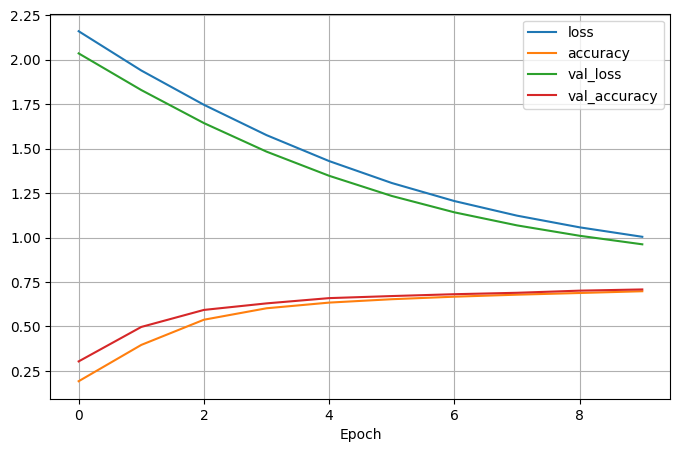

In [20]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_ylim(0, 1)
plt.xlabel("Epoch")
plt.show()

Note that the validation error is computed at the end of each epoch, whereas the training error is computed using a running mean during each epoch.

### Evaluating on the test set

We can evaluate the model on the test set using `model.evaluate`.

In [21]:
model.evaluate(X_test, y_test)

  1/313 [..............................] - ETA: 5s - loss: 1.0352 - accuracy: 0.6875

 42/313 [===>..........................] - ETA: 0s - loss: 0.9976 - accuracy: 0.6905

 76/313 [======>.......................] - ETA: 0s - loss: 0.9815 - accuracy: 0.7015

114/313 [=========>....................] - ETA: 0s - loss: 0.9998 - accuracy: 0.6913

154/313 [=============>................] - ETA: 0s - loss: 0.9935 - accuracy: 0.6940

195/313 [=================>............] - ETA: 0s - loss: 0.9921 - accuracy: 0.6934

234/313 [=====================>........] - ETA: 0s - loss: 0.9949 - accuracy: 0.6910

273/313 [=========================>....] - ETA: 0s - loss: 0.9939 - accuracy: 0.6930

312/313 [============================>.] - ETA: 0s - loss: 0.9923 - accuracy: 0.6925

313/313 [==============================] - 0s 1ms/step - loss: 0.9921 - accuracy: 0.6924


[0.9921249747276306, 0.6923999786376953]

### Predictions

We can make predictions on new data using `model.predict`.

Consider the first three images in the test set.

In [22]:
X_new = X_test[:3]

Estimating class probabilities:

In [23]:
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 72ms/step


array([[0.01, 0.01, 0.01, 0.01, 0.01, 0.21, 0.01, 0.18, 0.11, 0.45],
       [0.04, 0.01, 0.46, 0.01, 0.26, 0.  , 0.2 , 0.  , 0.02, 0.01],
       [0.01, 0.85, 0.02, 0.09, 0.01, 0.  , 0.01, 0.  , 0.  , 0.  ]],
      dtype=float32)

Making class predictions:

In [24]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 15ms/step


array([9, 2, 1])

In [25]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

Check with test set targets:

In [26]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

Let's view the images considered for prediction.

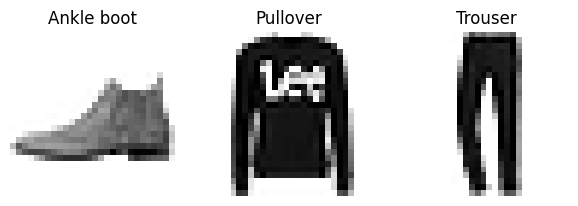

In [27]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

**Exercises:** *You can now complete Exercise 1 in the exercises associated with this lecture.*

## Functional API

While the *Sequential API* is very easy to use and many models are sequential in nature, it is also somewhat limited. 

The *Functional API* allows more complex models to be built.

For example, a Wide & Deep neural network (see [paper](https://ai.google/research/pubs/pub45413)) connects all or part of the inputs directly to the output layer.

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture12_Images/wide_deep_architecture.png" width="600px" style="display:block; margin:auto"/>

[Credit: Geron]

### Loading data

We will illustrate the use of the Functional API to build this model, using the California housing dataset as a regression problem.

In [28]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

The dataset contains 8 features (displayed below) contained in `housing.data` that can be used to predict house prices (in units of $100,000), which are contained in `housing.targets`.

In [29]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

Split the data into training, validation and test sets.

In [30]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

Scale features to standardise.

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

### Building the model

In [32]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

Setting up the functional model consists of the following steps.

1. Set up the input of the model.
2. Create a dense layer with 30 neurons that takes `_input` as the input, and includes a ReLU activation function.
3. Create a dense layer with 30 neurons that takes the output of the previous layer as an input, and includes a ReLU activation function.
4. Concatenate the input and the output of the second hidden layer.
5. Create a dense layer that takes the concatenated data as an input and outputs a single value (for the regression model).
6. Build the model specifying the inputs and outputs (of which there can be multiple).

Note that each component is called like a function, mapping inputs to outputs, hence the name of the *Functional API*.

In [33]:
model.summary()

Model: "model"


__________________________________________________________________________________________________


 Layer (type)                Output Shape                 Param #   Connected to                  


 input_1 (InputLayer)        [(None, 8)]                  0         []                            


 dense_6 (Dense)             (None, 30)                   270       ['input_1[0][0]']             


 dense_7 (Dense)             (None, 30)                   930       ['dense_6[0][0]']             


 concatenate (Concatenate)   (None, 38)                   0         ['input_1[0][0]',             


                                                                     'dense_7[0][0]']             


 dense_8 (Dense)             (None, 1)                    39        ['concatenate[0][0]']         


Total params: 1239 (4.84 KB)


Trainable params: 1239 (4.84 KB)


Non-trainable params: 0 (0.00 Byte)


__________________________________________________________________________________________________


### Compiling the model

Once the model is created we again need to *compile* the mode to specify the loss function and the optimizer to use to train the model.  

In [34]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.legacy.SGD(learning_rate=1e-4))

### Fitting the model

Again we fit the model, given training and validation data and number of epochs, and compute the loss on the validation data at the end of each epoch.

In [35]:
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20


  1/363 [..............................] - ETA: 1:27 - loss: 5.0352

 59/363 [===>..........................] - ETA: 0s - loss: 4.4361  

116/363 [========>.....................] - ETA: 0s - loss: 4.4623

175/363 [=============>................] - ETA: 0s - loss: 4.2806

227/363 [=================>............] - ETA: 0s - loss: 4.1482

285/363 [======================>.......] - ETA: 0s - loss: 4.0619

338/363 [==========================>...] - ETA: 0s - loss: 4.0001

363/363 [==============================] - 1s 1ms/step - loss: 3.9669 - val_loss: 3.2366


Epoch 2/20


  1/363 [..............................] - ETA: 1s - loss: 2.8640

 57/363 [===>..........................] - ETA: 0s - loss: 3.2584

114/363 [========>.....................] - ETA: 0s - loss: 3.1807

171/363 [=============>................] - ETA: 0s - loss: 3.1405

230/363 [==================>...........] - ETA: 0s - loss: 3.0758

289/363 [======================>.......] - ETA: 0s - loss: 3.0021

349/363 [===========================>..] - ETA: 0s - loss: 2.9106

363/363 [==============================] - 0s 1ms/step - loss: 2.8904 - val_loss: 2.4843


Epoch 3/20


  1/363 [..............................] - ETA: 1s - loss: 3.2218

 59/363 [===>..........................] - ETA: 0s - loss: 2.4117

119/363 [========>.....................] - ETA: 0s - loss: 2.3231

179/363 [=============>................] - ETA: 0s - loss: 2.2530

238/363 [==================>...........] - ETA: 0s - loss: 2.2016

290/363 [======================>.......] - ETA: 0s - loss: 2.1544

350/363 [===========================>..] - ETA: 0s - loss: 2.1172

363/363 [==============================] - 0s 1ms/step - loss: 2.1077 - val_loss: 2.3508


Epoch 4/20


  1/363 [..............................] - ETA: 0s - loss: 1.7996

 59/363 [===>..........................] - ETA: 0s - loss: 1.7586

120/363 [========>.....................] - ETA: 0s - loss: 1.7397

183/363 [==============>...............] - ETA: 0s - loss: 1.6909

244/363 [===================>..........] - ETA: 0s - loss: 1.6395

305/363 [========================>.....] - ETA: 0s - loss: 1.6097

363/363 [==============================] - 0s 1ms/step - loss: 1.5802 - val_loss: 2.3037


Epoch 5/20


  1/363 [..............................] - ETA: 1s - loss: 1.0817

 58/363 [===>..........................] - ETA: 0s - loss: 1.2705

116/363 [========>.....................] - ETA: 0s - loss: 1.2872

178/363 [=============>................] - ETA: 0s - loss: 1.3080

236/363 [==================>...........] - ETA: 0s - loss: 1.3184

291/363 [=======================>......] - ETA: 0s - loss: 1.2866

351/363 [============================>.] - ETA: 0s - loss: 1.2582

363/363 [==============================] - 0s 1ms/step - loss: 1.2488 - val_loss: 2.2434


Epoch 6/20


  1/363 [..............................] - ETA: 0s - loss: 0.9887

 59/363 [===>..........................] - ETA: 0s - loss: 1.0967

116/363 [========>.....................] - ETA: 0s - loss: 1.0821

176/363 [=============>................] - ETA: 0s - loss: 1.0856

236/363 [==================>...........] - ETA: 0s - loss: 1.0620

295/363 [=======================>......] - ETA: 0s - loss: 1.0664

353/363 [============================>.] - ETA: 0s - loss: 1.0502

363/363 [==============================] - 0s 1ms/step - loss: 1.0483 - val_loss: 2.0401


Epoch 7/20


  1/363 [..............................] - ETA: 1s - loss: 0.8572

 60/363 [===>..........................] - ETA: 0s - loss: 0.9367

119/363 [========>.....................] - ETA: 0s - loss: 0.9612

177/363 [=============>................] - ETA: 0s - loss: 0.9483

237/363 [==================>...........] - ETA: 0s - loss: 0.9361

298/363 [=======================>......] - ETA: 0s - loss: 0.9425

355/363 [============================>.] - ETA: 0s - loss: 0.9286

363/363 [==============================] - 0s 1ms/step - loss: 0.9279 - val_loss: 1.7862


Epoch 8/20


  1/363 [..............................] - ETA: 0s - loss: 1.0893

 56/363 [===>..........................] - ETA: 0s - loss: 0.8884

116/363 [========>.....................] - ETA: 0s - loss: 0.8675

175/363 [=============>................] - ETA: 0s - loss: 0.8943

233/363 [==================>...........] - ETA: 0s - loss: 0.8688

294/363 [=======================>......] - ETA: 0s - loss: 0.8561

354/363 [============================>.] - ETA: 0s - loss: 0.8519

363/363 [==============================] - 0s 1ms/step - loss: 0.8540 - val_loss: 1.5311


Epoch 9/20


  1/363 [..............................] - ETA: 0s - loss: 0.3581

 58/363 [===>..........................] - ETA: 0s - loss: 0.8123

115/363 [========>.....................] - ETA: 0s - loss: 0.8187

172/363 [=============>................] - ETA: 0s - loss: 0.8233

230/363 [==================>...........] - ETA: 0s - loss: 0.8288

291/363 [=======================>......] - ETA: 0s - loss: 0.8183

353/363 [============================>.] - ETA: 0s - loss: 0.8107

363/363 [==============================] - 0s 1ms/step - loss: 0.8065 - val_loss: 1.3055


Epoch 10/20


  1/363 [..............................] - ETA: 1s - loss: 0.6485

 58/363 [===>..........................] - ETA: 0s - loss: 0.7880

116/363 [========>.....................] - ETA: 0s - loss: 0.7582

172/363 [=============>................] - ETA: 0s - loss: 0.7635

225/363 [=================>............] - ETA: 0s - loss: 0.7606

283/363 [======================>.......] - ETA: 0s - loss: 0.7640

342/363 [===========================>..] - ETA: 0s - loss: 0.7726

363/363 [==============================] - 0s 1ms/step - loss: 0.7745 - val_loss: 1.1189


Epoch 11/20


  1/363 [..............................] - ETA: 1s - loss: 0.8449

 61/363 [====>.........................] - ETA: 0s - loss: 0.7597

120/363 [========>.....................] - ETA: 0s - loss: 0.7654

181/363 [=============>................] - ETA: 0s - loss: 0.7683

242/363 [===================>..........] - ETA: 0s - loss: 0.7545

299/363 [=======================>......] - ETA: 0s - loss: 0.7466

355/363 [============================>.] - ETA: 0s - loss: 0.7501

363/363 [==============================] - 0s 1ms/step - loss: 0.7515 - val_loss: 0.9730


Epoch 12/20


  1/363 [..............................] - ETA: 1s - loss: 0.7637

 58/363 [===>..........................] - ETA: 0s - loss: 0.7466

113/363 [========>.....................] - ETA: 0s - loss: 0.7441

168/363 [============>.................] - ETA: 0s - loss: 0.7316

222/363 [=================>............] - ETA: 0s - loss: 0.7266

276/363 [=====================>........] - ETA: 0s - loss: 0.7317

332/363 [==========================>...] - ETA: 0s - loss: 0.7322

363/363 [==============================] - 0s 1ms/step - loss: 0.7339 - val_loss: 0.8720


Epoch 13/20


  1/363 [..............................] - ETA: 0s - loss: 0.5952

 60/363 [===>..........................] - ETA: 0s - loss: 0.6964

118/363 [========>.....................] - ETA: 0s - loss: 0.7134

178/363 [=============>................] - ETA: 0s - loss: 0.7313

238/363 [==================>...........] - ETA: 0s - loss: 0.7318

298/363 [=======================>......] - ETA: 0s - loss: 0.7211

359/363 [============================>.] - ETA: 0s - loss: 0.7228

363/363 [==============================] - 0s 1ms/step - loss: 0.7200 - val_loss: 0.7940


Epoch 14/20


  1/363 [..............................] - ETA: 0s - loss: 1.0001

 59/363 [===>..........................] - ETA: 0s - loss: 0.6903

114/363 [========>.....................] - ETA: 0s - loss: 0.6875

171/363 [=============>................] - ETA: 0s - loss: 0.6806

230/363 [==================>...........] - ETA: 0s - loss: 0.6973

290/363 [======================>.......] - ETA: 0s - loss: 0.7051

350/363 [===========================>..] - ETA: 0s - loss: 0.7041

363/363 [==============================] - 0s 1ms/step - loss: 0.7083 - val_loss: 0.7394


Epoch 15/20


  1/363 [..............................] - ETA: 0s - loss: 0.6757

 59/363 [===>..........................] - ETA: 0s - loss: 0.6625

111/363 [========>.....................] - ETA: 0s - loss: 0.6688

168/363 [============>.................] - ETA: 0s - loss: 0.6872

225/363 [=================>............] - ETA: 0s - loss: 0.6858

283/363 [======================>.......] - ETA: 0s - loss: 0.6934

341/363 [===========================>..] - ETA: 0s - loss: 0.6944

363/363 [==============================] - 0s 1ms/step - loss: 0.6983 - val_loss: 0.7027


Epoch 16/20


  1/363 [..............................] - ETA: 0s - loss: 0.2976

 60/363 [===>..........................] - ETA: 0s - loss: 0.6761

118/363 [========>.....................] - ETA: 0s - loss: 0.6944

177/363 [=============>................] - ETA: 0s - loss: 0.6842

236/363 [==================>...........] - ETA: 0s - loss: 0.6842

293/363 [=======================>......] - ETA: 0s - loss: 0.6802

352/363 [============================>.] - ETA: 0s - loss: 0.6855

363/363 [==============================] - 0s 1ms/step - loss: 0.6895 - val_loss: 0.6740


Epoch 17/20


  1/363 [..............................] - ETA: 0s - loss: 1.0462

 60/363 [===>..........................] - ETA: 0s - loss: 0.6561

119/363 [========>.....................] - ETA: 0s - loss: 0.6876

178/363 [=============>................] - ETA: 0s - loss: 0.6691

237/363 [==================>...........] - ETA: 0s - loss: 0.6792

297/363 [=======================>......] - ETA: 0s - loss: 0.6716

351/363 [============================>.] - ETA: 0s - loss: 0.6794

363/363 [==============================] - 0s 1ms/step - loss: 0.6814 - val_loss: 0.6559


Epoch 18/20


  1/363 [..............................] - ETA: 0s - loss: 0.8168

 58/363 [===>..........................] - ETA: 0s - loss: 0.7141

115/363 [========>.....................] - ETA: 0s - loss: 0.7038

170/363 [=============>................] - ETA: 0s - loss: 0.6820

226/363 [=================>............] - ETA: 0s - loss: 0.6773

284/363 [======================>.......] - ETA: 0s - loss: 0.6732

342/363 [===========================>..] - ETA: 0s - loss: 0.6720

363/363 [==============================] - 0s 1ms/step - loss: 0.6740 - val_loss: 0.6436


Epoch 19/20


  1/363 [..............................] - ETA: 0s - loss: 0.5625

 58/363 [===>..........................] - ETA: 0s - loss: 0.6698

115/363 [========>.....................] - ETA: 0s - loss: 0.6424

174/363 [=============>................] - ETA: 0s - loss: 0.6532

233/363 [==================>...........] - ETA: 0s - loss: 0.6533

295/363 [=======================>......] - ETA: 0s - loss: 0.6602

355/363 [============================>.] - ETA: 0s - loss: 0.6689

363/363 [==============================] - 0s 1ms/step - loss: 0.6671 - val_loss: 0.6339


Epoch 20/20


  1/363 [..............................] - ETA: 1s - loss: 0.3245

 57/363 [===>..........................] - ETA: 0s - loss: 0.6900

118/363 [========>.....................] - ETA: 0s - loss: 0.6724

179/363 [=============>................] - ETA: 0s - loss: 0.6647

237/363 [==================>...........] - ETA: 0s - loss: 0.6587

296/363 [=======================>......] - ETA: 0s - loss: 0.6589

354/363 [============================>.] - ETA: 0s - loss: 0.6605

363/363 [==============================] - 0s 1ms/step - loss: 0.6606 - val_loss: 0.6268


### Evaluating on the test set

We evaluate the model on the test set as before.

In [36]:
mse_test = model.evaluate(X_test, y_test)

  1/162 [..............................] - ETA: 2s - loss: 0.7559

 64/162 [==========>...................] - ETA: 0s - loss: 0.6827

128/162 [======================>.......] - ETA: 0s - loss: 0.6675

162/162 [==============================] - 0s 815us/step - loss: 0.6546


### Predictions

We again make predictions on new data (the first three instances of the test set) using `model.predict`.

In [37]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 46ms/step


array([[0.8628876],
       [1.0634453],
       [2.492951 ]], dtype=float32)

## Subclassing API

Both the *Sequential API* and the *Functional API* support static models: they involving defining a model and then feeding it data for training or inference.

The *Subclassing API* allows you to subclass Keras models (and other objects such as layers).  This supports dynamic models and allows you to construct alternative model objects that can be widely used elsewhere.

### Building the model

Let's use the *Subclassing API* to build a Wide & Deep neural network with two inputs and two outputs as an example.

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture12_Images/wide_deep_architecture_multiple_io.png" width="600px" style="display:block; margin:auto"/>

[Credit: Geron]

Firstly, let's spit our data so we have two sets of inputs.

In [38]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

A model class can then be written to implement the model, inheriting from `keras.models.Model`.

In [39]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

The model must have `__init__` and `call` methods.  Within `__init__` you need to instantiate the layers that you need, before you make use of them within `call`.

Since the `call` method is implemented directly, there is a great deal of flexibility to implement complex models.

The model can then be used like other Keras model and you can compile and fit it as usual.

Note that for bespoke models implemented this way, Keras cannot easily inspect it.  Thus, it is not so straightforward, e.g., to save the model or to perform type and shape checking.  

### Compiling the model

In [40]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.legacy.SGD(learning_rate=1e-4))

### Fitting the model

In [41]:
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=20,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))

Epoch 1/20


  1/363 [..............................] - ETA: 2:53 - loss: 5.9495 - output_1_loss: 6.0951 - output_2_loss: 4.6391

 52/363 [===>..........................] - ETA: 0s - loss: 6.0571 - output_1_loss: 6.1273 - output_2_loss: 5.4251  

102/363 [=======>......................] - ETA: 0s - loss: 5.8515 - output_1_loss: 5.9350 - output_2_loss: 5.0999

151/363 [===========>..................] - ETA: 0s - loss: 5.6583 - output_1_loss: 5.7532 - output_2_loss: 4.8042

199/363 [===============>..............] - ETA: 0s - loss: 5.5574 - output_1_loss: 5.6443 - output_2_loss: 4.7752

250/363 [===================>..........] - ETA: 0s - loss: 5.4171 - output_1_loss: 5.4875 - output_2_loss: 4.7839

299/363 [=======================>......] - ETA: 0s - loss: 5.3115 - output_1_loss: 5.3816 - output_2_loss: 4.6811

348/363 [===========================>..] - ETA: 0s - loss: 5.2010 - output_1_loss: 5.2643 - output_2_loss: 4.6313

363/363 [==============================] - 1s 2ms/step - loss: 5.1666 - output_1_loss: 5.2294 - output_2_loss: 4.6012 - val_loss: 8.9329 - val_output_1_loss: 8.5437 - val_output_2_loss: 12.4361


Epoch 2/20


  1/363 [..............................] - ETA: 0s - loss: 4.9774 - output_1_loss: 5.0323 - output_2_loss: 4.4826

 50/363 [===>..........................] - ETA: 0s - loss: 4.2478 - output_1_loss: 4.2542 - output_2_loss: 4.1908

101/363 [=======>......................] - ETA: 0s - loss: 4.2878 - output_1_loss: 4.2640 - output_2_loss: 4.5021

149/363 [===========>..................] - ETA: 0s - loss: 4.1819 - output_1_loss: 4.1161 - output_2_loss: 4.7746

202/363 [===============>..............] - ETA: 0s - loss: 4.0247 - output_1_loss: 3.9733 - output_2_loss: 4.4874

255/363 [====================>.........] - ETA: 0s - loss: 3.9606 - output_1_loss: 3.9188 - output_2_loss: 4.3373

307/363 [========================>.....] - ETA: 0s - loss: 3.8794 - output_1_loss: 3.8357 - output_2_loss: 4.2727

358/363 [============================>.] - ETA: 0s - loss: 3.8194 - output_1_loss: 3.7715 - output_2_loss: 4.2503

363/363 [==============================] - 0s 1ms/step - loss: 3.8165 - output_1_loss: 3.7694 - output_2_loss: 4.2401 - val_loss: 9.7437 - val_output_1_loss: 9.4373 - val_output_2_loss: 12.5014


Epoch 3/20


  1/363 [..............................] - ETA: 1s - loss: 1.7409 - output_1_loss: 1.7139 - output_2_loss: 1.9834

 50/363 [===>..........................] - ETA: 0s - loss: 3.1510 - output_1_loss: 3.0608 - output_2_loss: 3.9628

 96/363 [======>.......................] - ETA: 0s - loss: 3.1317 - output_1_loss: 3.0685 - output_2_loss: 3.7005

139/363 [==========>...................] - ETA: 0s - loss: 3.0868 - output_1_loss: 3.0245 - output_2_loss: 3.6475

186/363 [==============>...............] - ETA: 0s - loss: 3.0567 - output_1_loss: 2.9829 - output_2_loss: 3.7207

235/363 [==================>...........] - ETA: 0s - loss: 3.0746 - output_1_loss: 2.9889 - output_2_loss: 3.8455

288/363 [======================>.......] - ETA: 0s - loss: 3.0133 - output_1_loss: 2.9317 - output_2_loss: 3.7479

336/363 [==========================>...] - ETA: 0s - loss: 3.0031 - output_1_loss: 2.8997 - output_2_loss: 3.9336

363/363 [==============================] - 1s 1ms/step - loss: 2.9813 - output_1_loss: 2.8787 - output_2_loss: 3.9055 - val_loss: 9.8886 - val_output_1_loss: 9.6674 - val_output_2_loss: 11.8800


Epoch 4/20


  1/363 [..............................] - ETA: 0s - loss: 1.9687 - output_1_loss: 1.9417 - output_2_loss: 2.2123

 53/363 [===>..........................] - ETA: 0s - loss: 3.1077 - output_1_loss: 2.8441 - output_2_loss: 5.4795

106/363 [=======>......................] - ETA: 0s - loss: 2.7774 - output_1_loss: 2.5984 - output_2_loss: 4.3885

160/363 [============>.................] - ETA: 0s - loss: 2.6253 - output_1_loss: 2.4687 - output_2_loss: 4.0350

207/363 [================>.............] - ETA: 0s - loss: 2.5731 - output_1_loss: 2.4303 - output_2_loss: 3.8581

261/363 [====================>.........] - ETA: 0s - loss: 2.5021 - output_1_loss: 2.3671 - output_2_loss: 3.7170

314/363 [========================>.....] - ETA: 0s - loss: 2.4502 - output_1_loss: 2.3205 - output_2_loss: 3.6177

363/363 [==============================] - 0s 1ms/step - loss: 2.4344 - output_1_loss: 2.3071 - output_2_loss: 3.5801 - val_loss: 9.8739 - val_output_1_loss: 9.7212 - val_output_2_loss: 11.2478


Epoch 5/20


  1/363 [..............................] - ETA: 0s - loss: 2.5113 - output_1_loss: 2.4388 - output_2_loss: 3.1637

 56/363 [===>..........................] - ETA: 0s - loss: 2.3384 - output_1_loss: 2.1518 - output_2_loss: 4.0173

104/363 [=======>......................] - ETA: 0s - loss: 2.2213 - output_1_loss: 2.0743 - output_2_loss: 3.5444

150/363 [===========>..................] - ETA: 0s - loss: 2.1361 - output_1_loss: 2.0051 - output_2_loss: 3.3151

201/363 [===============>..............] - ETA: 0s - loss: 2.1018 - output_1_loss: 1.9487 - output_2_loss: 3.4799

251/363 [===================>..........] - ETA: 0s - loss: 2.0640 - output_1_loss: 1.9160 - output_2_loss: 3.3964

302/363 [=======================>......] - ETA: 0s - loss: 2.0455 - output_1_loss: 1.8993 - output_2_loss: 3.3611

353/363 [============================>.] - ETA: 0s - loss: 2.0786 - output_1_loss: 1.9393 - output_2_loss: 3.3318

363/363 [==============================] - 1s 1ms/step - loss: 2.0728 - output_1_loss: 1.9342 - output_2_loss: 3.3204 - val_loss: 9.1247 - val_output_1_loss: 9.0077 - val_output_2_loss: 10.1777


Epoch 6/20


  1/363 [..............................] - ETA: 1s - loss: 1.0240 - output_1_loss: 0.9778 - output_2_loss: 1.4401

 51/363 [===>..........................] - ETA: 0s - loss: 1.8917 - output_1_loss: 1.7541 - output_2_loss: 3.1298

102/363 [=======>......................] - ETA: 0s - loss: 1.8304 - output_1_loss: 1.7160 - output_2_loss: 2.8603

154/363 [===========>..................] - ETA: 0s - loss: 1.8077 - output_1_loss: 1.6854 - output_2_loss: 2.9082

203/363 [===============>..............] - ETA: 0s - loss: 1.8809 - output_1_loss: 1.7571 - output_2_loss: 2.9953

252/363 [===================>..........] - ETA: 0s - loss: 1.8632 - output_1_loss: 1.7383 - output_2_loss: 2.9875

301/363 [=======================>......] - ETA: 0s - loss: 1.8733 - output_1_loss: 1.7290 - output_2_loss: 3.1720

352/363 [============================>.] - ETA: 0s - loss: 1.8348 - output_1_loss: 1.6921 - output_2_loss: 3.1197

363/363 [==============================] - 0s 1ms/step - loss: 1.8235 - output_1_loss: 1.6825 - output_2_loss: 3.0927 - val_loss: 8.4011 - val_output_1_loss: 8.3001 - val_output_2_loss: 9.3098


Epoch 7/20


  1/363 [..............................] - ETA: 0s - loss: 1.5903 - output_1_loss: 1.4835 - output_2_loss: 2.5516

 54/363 [===>..........................] - ETA: 0s - loss: 1.5687 - output_1_loss: 1.4613 - output_2_loss: 2.5352

103/363 [=======>......................] - ETA: 0s - loss: 1.6021 - output_1_loss: 1.4885 - output_2_loss: 2.6243

153/363 [===========>..................] - ETA: 0s - loss: 1.6556 - output_1_loss: 1.5085 - output_2_loss: 2.9796

204/363 [===============>..............] - ETA: 0s - loss: 1.6590 - output_1_loss: 1.5031 - output_2_loss: 3.0621

256/363 [====================>.........] - ETA: 0s - loss: 1.7237 - output_1_loss: 1.5714 - output_2_loss: 3.0949

308/363 [========================>.....] - ETA: 0s - loss: 1.6764 - output_1_loss: 1.5309 - output_2_loss: 2.9857

358/363 [============================>.] - ETA: 0s - loss: 1.6495 - output_1_loss: 1.5082 - output_2_loss: 2.9210

363/363 [==============================] - 0s 1ms/step - loss: 1.6454 - output_1_loss: 1.5047 - output_2_loss: 2.9119 - val_loss: 7.6133 - val_output_1_loss: 7.5168 - val_output_2_loss: 8.4824


Epoch 8/20


  1/363 [..............................] - ETA: 0s - loss: 1.3825 - output_1_loss: 1.2845 - output_2_loss: 2.2640

 54/363 [===>..........................] - ETA: 0s - loss: 1.4973 - output_1_loss: 1.3746 - output_2_loss: 2.6014

104/363 [=======>......................] - ETA: 0s - loss: 1.4948 - output_1_loss: 1.3711 - output_2_loss: 2.6079

159/363 [============>.................] - ETA: 0s - loss: 1.4934 - output_1_loss: 1.3685 - output_2_loss: 2.6174

209/363 [================>.............] - ETA: 0s - loss: 1.4920 - output_1_loss: 1.3648 - output_2_loss: 2.6364

259/363 [====================>.........] - ETA: 0s - loss: 1.5492 - output_1_loss: 1.4191 - output_2_loss: 2.7209

305/363 [========================>.....] - ETA: 0s - loss: 1.5131 - output_1_loss: 1.3869 - output_2_loss: 2.6493

354/363 [============================>.] - ETA: 0s - loss: 1.5159 - output_1_loss: 1.3761 - output_2_loss: 2.7740

363/363 [==============================] - 1s 1ms/step - loss: 1.5134 - output_1_loss: 1.3747 - output_2_loss: 2.7617 - val_loss: 6.8256 - val_output_1_loss: 6.7243 - val_output_2_loss: 7.7376


Epoch 9/20


  1/363 [..............................] - ETA: 1s - loss: 1.9564 - output_1_loss: 1.8695 - output_2_loss: 2.7385

 50/363 [===>..........................] - ETA: 0s - loss: 1.4105 - output_1_loss: 1.2855 - output_2_loss: 2.5356

 96/363 [======>.......................] - ETA: 0s - loss: 1.3449 - output_1_loss: 1.2343 - output_2_loss: 2.3405

146/363 [===========>..................] - ETA: 0s - loss: 1.3721 - output_1_loss: 1.2571 - output_2_loss: 2.4074

196/363 [===============>..............] - ETA: 0s - loss: 1.3777 - output_1_loss: 1.2489 - output_2_loss: 2.5369

248/363 [===================>..........] - ETA: 0s - loss: 1.4463 - output_1_loss: 1.3033 - output_2_loss: 2.7331

297/363 [=======================>......] - ETA: 0s - loss: 1.4352 - output_1_loss: 1.2943 - output_2_loss: 2.7037

346/363 [===========================>..] - ETA: 0s - loss: 1.4188 - output_1_loss: 1.2805 - output_2_loss: 2.6633

363/363 [==============================] - 0s 1ms/step - loss: 1.4119 - output_1_loss: 1.2751 - output_2_loss: 2.6428 - val_loss: 6.0924 - val_output_1_loss: 5.9825 - val_output_2_loss: 7.0812


Epoch 10/20


  1/363 [..............................] - ETA: 0s - loss: 0.9065 - output_1_loss: 0.8534 - output_2_loss: 1.3838

 51/363 [===>..........................] - ETA: 0s - loss: 1.3488 - output_1_loss: 1.1433 - output_2_loss: 3.1982

101/363 [=======>......................] - ETA: 0s - loss: 1.3550 - output_1_loss: 1.1842 - output_2_loss: 2.8915

152/363 [===========>..................] - ETA: 0s - loss: 1.4026 - output_1_loss: 1.2485 - output_2_loss: 2.7898

200/363 [===============>..............] - ETA: 0s - loss: 1.3824 - output_1_loss: 1.2375 - output_2_loss: 2.6867

249/363 [===================>..........] - ETA: 0s - loss: 1.3488 - output_1_loss: 1.2108 - output_2_loss: 2.5899

298/363 [=======================>......] - ETA: 0s - loss: 1.3500 - output_1_loss: 1.2100 - output_2_loss: 2.6099

349/363 [===========================>..] - ETA: 0s - loss: 1.3370 - output_1_loss: 1.2008 - output_2_loss: 2.5630

363/363 [==============================] - 0s 1ms/step - loss: 1.3303 - output_1_loss: 1.1955 - output_2_loss: 2.5440 - val_loss: 5.4380 - val_output_1_loss: 5.3196 - val_output_2_loss: 6.5039


Epoch 11/20


  1/363 [..............................] - ETA: 0s - loss: 1.5180 - output_1_loss: 1.3963 - output_2_loss: 2.6139

 52/363 [===>..........................] - ETA: 0s - loss: 1.3030 - output_1_loss: 1.1988 - output_2_loss: 2.2416

105/363 [=======>......................] - ETA: 0s - loss: 1.2512 - output_1_loss: 1.1434 - output_2_loss: 2.2213

154/363 [===========>..................] - ETA: 0s - loss: 1.2433 - output_1_loss: 1.1285 - output_2_loss: 2.2770

205/363 [===============>..............] - ETA: 0s - loss: 1.2307 - output_1_loss: 1.1113 - output_2_loss: 2.3052

250/363 [===================>..........] - ETA: 0s - loss: 1.2559 - output_1_loss: 1.1394 - output_2_loss: 2.3045

303/363 [========================>.....] - ETA: 0s - loss: 1.2760 - output_1_loss: 1.1442 - output_2_loss: 2.4626

354/363 [============================>.] - ETA: 0s - loss: 1.2682 - output_1_loss: 1.1351 - output_2_loss: 2.4661

363/363 [==============================] - 0s 1ms/step - loss: 1.2631 - output_1_loss: 1.1304 - output_2_loss: 2.4568 - val_loss: 4.8119 - val_output_1_loss: 4.6836 - val_output_2_loss: 5.9661


Epoch 12/20


  1/363 [..............................] - ETA: 0s - loss: 1.9196 - output_1_loss: 1.1303 - output_2_loss: 9.0233

 54/363 [===>..........................] - ETA: 0s - loss: 1.2117 - output_1_loss: 1.0882 - output_2_loss: 2.3228

105/363 [=======>......................] - ETA: 0s - loss: 1.1847 - output_1_loss: 1.0502 - output_2_loss: 2.3946

156/363 [===========>..................] - ETA: 0s - loss: 1.1920 - output_1_loss: 1.0636 - output_2_loss: 2.3473

208/363 [================>.............] - ETA: 0s - loss: 1.1882 - output_1_loss: 1.0635 - output_2_loss: 2.3106

260/363 [====================>.........] - ETA: 0s - loss: 1.2008 - output_1_loss: 1.0623 - output_2_loss: 2.4469

311/363 [========================>.....] - ETA: 0s - loss: 1.2303 - output_1_loss: 1.0943 - output_2_loss: 2.4544

362/363 [============================>.] - ETA: 0s - loss: 1.2061 - output_1_loss: 1.0754 - output_2_loss: 2.3827

363/363 [==============================] - 0s 1ms/step - loss: 1.2060 - output_1_loss: 1.0753 - output_2_loss: 2.3819 - val_loss: 4.2704 - val_output_1_loss: 4.1343 - val_output_2_loss: 5.4956


Epoch 13/20


  1/363 [..............................] - ETA: 0s - loss: 0.8407 - output_1_loss: 0.7319 - output_2_loss: 1.8197

 51/363 [===>..........................] - ETA: 0s - loss: 1.1896 - output_1_loss: 1.0395 - output_2_loss: 2.5410

101/363 [=======>......................] - ETA: 0s - loss: 1.1840 - output_1_loss: 1.0433 - output_2_loss: 2.4503

152/363 [===========>..................] - ETA: 0s - loss: 1.1807 - output_1_loss: 1.0480 - output_2_loss: 2.3753

199/363 [===============>..............] - ETA: 0s - loss: 1.1746 - output_1_loss: 1.0325 - output_2_loss: 2.4533

248/363 [===================>..........] - ETA: 0s - loss: 1.1553 - output_1_loss: 1.0213 - output_2_loss: 2.3614

300/363 [=======================>......] - ETA: 0s - loss: 1.1751 - output_1_loss: 1.0439 - output_2_loss: 2.3566

347/363 [===========================>..] - ETA: 0s - loss: 1.1645 - output_1_loss: 1.0341 - output_2_loss: 2.3378

363/363 [==============================] - 0s 1ms/step - loss: 1.1569 - output_1_loss: 1.0282 - output_2_loss: 2.3154 - val_loss: 3.8016 - val_output_1_loss: 3.6593 - val_output_2_loss: 5.0825


Epoch 14/20


  1/363 [..............................] - ETA: 1s - loss: 0.6749 - output_1_loss: 0.6196 - output_2_loss: 1.1729

 51/363 [===>..........................] - ETA: 0s - loss: 1.0651 - output_1_loss: 0.9537 - output_2_loss: 2.0670

101/363 [=======>......................] - ETA: 0s - loss: 1.1188 - output_1_loss: 1.0119 - output_2_loss: 2.0807

153/363 [===========>..................] - ETA: 0s - loss: 1.1152 - output_1_loss: 0.9961 - output_2_loss: 2.1875

206/363 [================>.............] - ETA: 0s - loss: 1.1078 - output_1_loss: 0.9791 - output_2_loss: 2.2658

258/363 [====================>.........] - ETA: 0s - loss: 1.1258 - output_1_loss: 0.9924 - output_2_loss: 2.3263

308/363 [========================>.....] - ETA: 0s - loss: 1.1181 - output_1_loss: 0.9886 - output_2_loss: 2.2832

361/363 [============================>.] - ETA: 0s - loss: 1.1158 - output_1_loss: 0.9885 - output_2_loss: 2.2618

363/363 [==============================] - 0s 1ms/step - loss: 1.1142 - output_1_loss: 0.9871 - output_2_loss: 2.2578 - val_loss: 3.4050 - val_output_1_loss: 3.2588 - val_output_2_loss: 4.7216


Epoch 15/20


  1/363 [..............................] - ETA: 0s - loss: 0.9080 - output_1_loss: 0.8253 - output_2_loss: 1.6530

 54/363 [===>..........................] - ETA: 0s - loss: 1.0464 - output_1_loss: 0.9325 - output_2_loss: 2.0720

104/363 [=======>......................] - ETA: 0s - loss: 1.0424 - output_1_loss: 0.9301 - output_2_loss: 2.0531

156/363 [===========>..................] - ETA: 0s - loss: 1.0765 - output_1_loss: 0.9597 - output_2_loss: 2.1278

209/363 [================>.............] - ETA: 0s - loss: 1.0646 - output_1_loss: 0.9435 - output_2_loss: 2.1545

258/363 [====================>.........] - ETA: 0s - loss: 1.0737 - output_1_loss: 0.9514 - output_2_loss: 2.1739

306/363 [========================>.....] - ETA: 0s - loss: 1.0697 - output_1_loss: 0.9493 - output_2_loss: 2.1530

359/363 [============================>.] - ETA: 0s - loss: 1.0771 - output_1_loss: 0.9517 - output_2_loss: 2.2064

363/363 [==============================] - 0s 1ms/step - loss: 1.0767 - output_1_loss: 0.9515 - output_2_loss: 2.2030 - val_loss: 3.0595 - val_output_1_loss: 2.9105 - val_output_2_loss: 4.4004


Epoch 16/20


  1/363 [..............................] - ETA: 0s - loss: 1.3305 - output_1_loss: 1.1126 - output_2_loss: 3.2913

 55/363 [===>..........................] - ETA: 0s - loss: 1.1316 - output_1_loss: 1.0014 - output_2_loss: 2.3039

105/363 [=======>......................] - ETA: 0s - loss: 1.0981 - output_1_loss: 0.9763 - output_2_loss: 2.1950

158/363 [============>.................] - ETA: 0s - loss: 1.0721 - output_1_loss: 0.9552 - output_2_loss: 2.1243

211/363 [================>.............] - ETA: 0s - loss: 1.0573 - output_1_loss: 0.9424 - output_2_loss: 2.0917

262/363 [====================>.........] - ETA: 0s - loss: 1.0523 - output_1_loss: 0.9283 - output_2_loss: 2.1680

314/363 [========================>.....] - ETA: 0s - loss: 1.0354 - output_1_loss: 0.9132 - output_2_loss: 2.1352

362/363 [============================>.] - ETA: 0s - loss: 1.0443 - output_1_loss: 0.9209 - output_2_loss: 2.1551

363/363 [==============================] - 1s 1ms/step - loss: 1.0435 - output_1_loss: 0.9200 - output_2_loss: 2.1545 - val_loss: 2.7641 - val_output_1_loss: 2.6134 - val_output_2_loss: 4.1204


Epoch 17/20


  1/363 [..............................] - ETA: 1s - loss: 1.1472 - output_1_loss: 0.9948 - output_2_loss: 2.5193

 53/363 [===>..........................] - ETA: 0s - loss: 1.0097 - output_1_loss: 0.8798 - output_2_loss: 2.1786

106/363 [=======>......................] - ETA: 0s - loss: 0.9986 - output_1_loss: 0.8812 - output_2_loss: 2.0546

156/363 [===========>..................] - ETA: 0s - loss: 1.0094 - output_1_loss: 0.8929 - output_2_loss: 2.0576

206/363 [================>.............] - ETA: 0s - loss: 0.9963 - output_1_loss: 0.8797 - output_2_loss: 2.0450

257/363 [====================>.........] - ETA: 0s - loss: 0.9980 - output_1_loss: 0.8740 - output_2_loss: 2.1140

303/363 [========================>.....] - ETA: 0s - loss: 1.0135 - output_1_loss: 0.8902 - output_2_loss: 2.1236

354/363 [============================>.] - ETA: 0s - loss: 1.0144 - output_1_loss: 0.8917 - output_2_loss: 2.1182

363/363 [==============================] - 0s 1ms/step - loss: 1.0140 - output_1_loss: 0.8923 - output_2_loss: 2.1099 - val_loss: 2.5018 - val_output_1_loss: 2.3494 - val_output_2_loss: 3.8739


Epoch 18/20


  1/363 [..............................] - ETA: 0s - loss: 0.8493 - output_1_loss: 0.7842 - output_2_loss: 1.4353

 55/363 [===>..........................] - ETA: 0s - loss: 0.9539 - output_1_loss: 0.8359 - output_2_loss: 2.0159

107/363 [=======>......................] - ETA: 0s - loss: 0.9541 - output_1_loss: 0.8415 - output_2_loss: 1.9673

158/363 [============>.................] - ETA: 0s - loss: 0.9774 - output_1_loss: 0.8599 - output_2_loss: 2.0354

207/363 [================>.............] - ETA: 0s - loss: 0.9876 - output_1_loss: 0.8668 - output_2_loss: 2.0747

256/363 [====================>.........] - ETA: 0s - loss: 0.9770 - output_1_loss: 0.8559 - output_2_loss: 2.0663

307/363 [========================>.....] - ETA: 0s - loss: 1.0019 - output_1_loss: 0.8779 - output_2_loss: 2.1173

353/363 [============================>.] - ETA: 0s - loss: 0.9938 - output_1_loss: 0.8729 - output_2_loss: 2.0818

363/363 [==============================] - 1s 1ms/step - loss: 0.9876 - output_1_loss: 0.8676 - output_2_loss: 2.0678 - val_loss: 2.2811 - val_output_1_loss: 2.1274 - val_output_2_loss: 3.6643


Epoch 19/20


  1/363 [..............................] - ETA: 1s - loss: 0.6459 - output_1_loss: 0.5558 - output_2_loss: 1.4569

 51/363 [===>..........................] - ETA: 0s - loss: 0.9932 - output_1_loss: 0.8923 - output_2_loss: 1.9013

100/363 [=======>......................] - ETA: 0s - loss: 0.9784 - output_1_loss: 0.8719 - output_2_loss: 1.9373

152/363 [===========>..................] - ETA: 0s - loss: 0.9856 - output_1_loss: 0.8748 - output_2_loss: 1.9831

201/363 [===============>..............] - ETA: 0s - loss: 0.9924 - output_1_loss: 0.8730 - output_2_loss: 2.0668

253/363 [===================>..........] - ETA: 0s - loss: 0.9778 - output_1_loss: 0.8599 - output_2_loss: 2.0383

299/363 [=======================>......] - ETA: 0s - loss: 0.9800 - output_1_loss: 0.8558 - output_2_loss: 2.0986

345/363 [===========================>..] - ETA: 0s - loss: 0.9679 - output_1_loss: 0.8480 - output_2_loss: 2.0469

363/363 [==============================] - 0s 1ms/step - loss: 0.9639 - output_1_loss: 0.8455 - output_2_loss: 2.0291 - val_loss: 2.0931 - val_output_1_loss: 1.9392 - val_output_2_loss: 3.4779


Epoch 20/20


  1/363 [..............................] - ETA: 0s - loss: 0.9185 - output_1_loss: 0.7133 - output_2_loss: 2.7648

 49/363 [===>..........................] - ETA: 0s - loss: 0.9584 - output_1_loss: 0.8310 - output_2_loss: 2.1053

100/363 [=======>......................] - ETA: 0s - loss: 0.9459 - output_1_loss: 0.8274 - output_2_loss: 2.0125

151/363 [===========>..................] - ETA: 0s - loss: 0.9363 - output_1_loss: 0.8224 - output_2_loss: 1.9617

200/363 [===============>..............] - ETA: 0s - loss: 0.9138 - output_1_loss: 0.8049 - output_2_loss: 1.8944

252/363 [===================>..........] - ETA: 0s - loss: 0.9145 - output_1_loss: 0.8067 - output_2_loss: 1.8843

302/363 [=======================>......] - ETA: 0s - loss: 0.9328 - output_1_loss: 0.8239 - output_2_loss: 1.9132

353/363 [============================>.] - ETA: 0s - loss: 0.9433 - output_1_loss: 0.8266 - output_2_loss: 1.9939

363/363 [==============================] - 0s 1ms/step - loss: 0.9424 - output_1_loss: 0.8257 - output_2_loss: 1.9931 - val_loss: 1.9300 - val_output_1_loss: 1.7766 - val_output_2_loss: 3.3108


### Evaluating and making predictions

In [42]:
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

  1/162 [..............................] - ETA: 3s - loss: 1.2951 - output_1_loss: 1.1938 - output_2_loss: 2.2066

 52/162 [========>.....................] - ETA: 0s - loss: 0.9102 - output_1_loss: 0.8088 - output_2_loss: 1.8225

107/162 [==================>...........] - ETA: 0s - loss: 0.8964 - output_1_loss: 0.7964 - output_2_loss: 1.7962

162/162 [==============================] - 0s 934us/step - loss: 0.9276 - output_1_loss: 0.7995 - output_2_loss: 2.0800


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 53ms/step


## Saving and restoring models

Keras can be used to easily save and restore models when using the *Sequential API* of the *Functional API*.

Models can of course be saved and restored when using the *Subclassing API* but it is necessary to use underlying TensorFlow methods and is not quite so straightforward (not covered further here).

Let's build and train a simple model and then save and restore it.

In [43]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [44]:
model.compile(loss="mse", optimizer=keras.optimizers.legacy.SGD(learning_rate=1e-4))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10


  1/363 [..............................] - ETA: 1:23 - loss: 4.5745

 62/363 [====>.........................] - ETA: 0s - loss: 4.7668  

119/363 [========>.....................] - ETA: 0s - loss: 4.6584

175/363 [=============>................] - ETA: 0s - loss: 4.4761

235/363 [==================>...........] - ETA: 0s - loss: 4.3275

294/363 [=======================>......] - ETA: 0s - loss: 4.1768

350/363 [===========================>..] - ETA: 0s - loss: 4.0678

363/363 [==============================] - 1s 1ms/step - loss: 4.0410 - val_loss: 5.5778


Epoch 2/10


  1/363 [..............................] - ETA: 0s - loss: 3.0976

 60/363 [===>..........................] - ETA: 0s - loss: 2.9435

118/363 [========>.....................] - ETA: 0s - loss: 2.9655

177/363 [=============>................] - ETA: 0s - loss: 2.9346

234/363 [==================>...........] - ETA: 0s - loss: 2.8576

291/363 [=======================>......] - ETA: 0s - loss: 2.8196

347/363 [===========================>..] - ETA: 0s - loss: 2.7350

363/363 [==============================] - 0s 1ms/step - loss: 2.7145 - val_loss: 5.8976


Epoch 3/10


  1/363 [..............................] - ETA: 0s - loss: 2.5945

 60/363 [===>..........................] - ETA: 0s - loss: 2.1624

117/363 [========>.....................] - ETA: 0s - loss: 2.1596

176/363 [=============>................] - ETA: 0s - loss: 2.1285

235/363 [==================>...........] - ETA: 0s - loss: 2.0518

293/363 [=======================>......] - ETA: 0s - loss: 2.0009

351/363 [============================>.] - ETA: 0s - loss: 1.9754

363/363 [==============================] - 0s 1ms/step - loss: 1.9766 - val_loss: 5.5406


Epoch 4/10


  1/363 [..............................] - ETA: 0s - loss: 1.7472

 55/363 [===>..........................] - ETA: 0s - loss: 1.5824

114/363 [========>.....................] - ETA: 0s - loss: 1.6371

173/363 [=============>................] - ETA: 0s - loss: 1.6401

234/363 [==================>...........] - ETA: 0s - loss: 1.5786

296/363 [=======================>......] - ETA: 0s - loss: 1.5782

353/363 [============================>.] - ETA: 0s - loss: 1.5413

363/363 [==============================] - 0s 1ms/step - loss: 1.5339 - val_loss: 4.7627


Epoch 5/10


  1/363 [..............................] - ETA: 1s - loss: 1.2416

 57/363 [===>..........................] - ETA: 0s - loss: 1.2652

113/363 [========>.....................] - ETA: 0s - loss: 1.3606

171/363 [=============>................] - ETA: 0s - loss: 1.2956

228/363 [=================>............] - ETA: 0s - loss: 1.2822

289/363 [======================>.......] - ETA: 0s - loss: 1.2741

347/363 [===========================>..] - ETA: 0s - loss: 1.2408

363/363 [==============================] - 0s 1ms/step - loss: 1.2504 - val_loss: 3.8661


Epoch 6/10


  1/363 [..............................] - ETA: 0s - loss: 0.5635

 59/363 [===>..........................] - ETA: 0s - loss: 1.0937

119/363 [========>.....................] - ETA: 0s - loss: 1.0923

176/363 [=============>................] - ETA: 0s - loss: 1.0825

227/363 [=================>............] - ETA: 0s - loss: 1.0764

286/363 [======================>.......] - ETA: 0s - loss: 1.0528

343/363 [===========================>..] - ETA: 0s - loss: 1.0436

363/363 [==============================] - 0s 1ms/step - loss: 1.0633 - val_loss: 3.0605


Epoch 7/10


  1/363 [..............................] - ETA: 0s - loss: 0.7616

 60/363 [===>..........................] - ETA: 0s - loss: 0.9854

117/363 [========>.....................] - ETA: 0s - loss: 0.9695

174/363 [=============>................] - ETA: 0s - loss: 0.9725

231/363 [==================>...........] - ETA: 0s - loss: 0.9754

287/363 [======================>.......] - ETA: 0s - loss: 0.9527

346/363 [===========================>..] - ETA: 0s - loss: 0.9369

363/363 [==============================] - 0s 1ms/step - loss: 0.9394 - val_loss: 2.3733


Epoch 8/10


  1/363 [..............................] - ETA: 0s - loss: 1.1187

 59/363 [===>..........................] - ETA: 0s - loss: 0.9431

117/363 [========>.....................] - ETA: 0s - loss: 0.9068

176/363 [=============>................] - ETA: 0s - loss: 0.8842

236/363 [==================>...........] - ETA: 0s - loss: 0.8673

294/363 [=======================>......] - ETA: 0s - loss: 0.8795

346/363 [===========================>..] - ETA: 0s - loss: 0.8639

363/363 [==============================] - 0s 1ms/step - loss: 0.8583 - val_loss: 1.9333


Epoch 9/10


  1/363 [..............................] - ETA: 0s - loss: 0.8088

 60/363 [===>..........................] - ETA: 0s - loss: 0.8009

122/363 [=========>....................] - ETA: 0s - loss: 0.8181

183/363 [==============>...............] - ETA: 0s - loss: 0.8112

242/363 [===================>..........] - ETA: 0s - loss: 0.8092

298/363 [=======================>......] - ETA: 0s - loss: 0.8075

357/363 [============================>.] - ETA: 0s - loss: 0.8048

363/363 [==============================] - 0s 1ms/step - loss: 0.8048 - val_loss: 1.5947


Epoch 10/10


  1/363 [..............................] - ETA: 0s - loss: 0.8307

 60/363 [===>..........................] - ETA: 0s - loss: 0.7763

117/363 [========>.....................] - ETA: 0s - loss: 0.7832

173/363 [=============>................] - ETA: 0s - loss: 0.7817

227/363 [=================>............] - ETA: 0s - loss: 0.7576

287/363 [======================>.......] - ETA: 0s - loss: 0.7532

342/363 [===========================>..] - ETA: 0s - loss: 0.7681

363/363 [==============================] - 0s 1ms/step - loss: 0.7680 - val_loss: 1.3381


  1/162 [..............................] - ETA: 2s - loss: 0.8639

 61/162 [==========>...................] - ETA: 0s - loss: 0.7393

125/162 [======================>.......] - ETA: 0s - loss: 0.7472

162/162 [==============================] - 0s 828us/step - loss: 0.7463


### Saving

Saving the model is simply one line.

In [45]:
model.save("my_keras_model.h5")

/opt/hostedtoolcache/Python/3.8.18/x64/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


The model is then saved using the Keras format.

The model's achitecture, values of the model parameters, the optimiser, hyperparameters, and state are all saved.

### Restoring

Restoring the model is also just one line.

In [46]:
model = keras.models.load_model("my_keras_model.h5")

The model can then be used as usual, e.g. to make predictions.

In [47]:
model.predict(X_new)

1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 43ms/step


array([[1.0386337],
       [1.1102493],
       [2.4406295]], dtype=float32)

### Checkpointing

Since training may take a long time, you might like to save the model weights as training progresses so that you do not lose the results if the machine crashes or disconnects.

Model weights can also be saved and loaded in a single line.

In [48]:
model.save_weights("my_keras_weights.ckpt")

In [49]:
model.load_weights("my_keras_weights.ckpt")

## TensorBoard

TensorBoard is an interactive visualisation tool that you can use to review learning curves, analyse training statistics and inspect the architecture of your model.

### Logging

Let's log a training run and model and then view in TensorBoard.

In [50]:
root_logdir = os.path.join(os.curdir, "my_logs")

In [51]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2024_01_10-00_22_18'

In [52]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [53]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.legacy.SGD(learning_rate=1e-4))

To log training as it progresses we need to set up `callback`.  

The `fit` methods allows a list of `callbacks` to be specified, which can then be called at the start and end of each epoch.

Let's set up two callbacks:
- One to checkpoint the model as we go, saving the best model considered so far, as evaluated on the validation set.
- One to log TensorBoard data.

In [54]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

The callbacks are then simply passed to the `fit` method.

In [55]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30


  1/363 [..............................] - ETA: 1:27 - loss: 7.0073

 53/363 [===>..........................] - ETA: 0s - loss: 6.0794  

104/363 [=======>......................] - ETA: 0s - loss: 5.9392

154/363 [===========>..................] - ETA: 0s - loss: 5.7578

203/363 [===============>..............] - ETA: 0s - loss: 5.5502

254/363 [===================>..........] - ETA: 0s - loss: 5.3746

298/363 [=======================>......] - ETA: 0s - loss: 5.2319

348/363 [===========================>..] - ETA: 0s - loss: 5.0715

363/363 [==============================] - 1s 2ms/step - loss: 5.0266 - val_loss: 3.9981


Epoch 2/30


  1/363 [..............................] - ETA: 1s - loss: 3.6957

 51/363 [===>..........................] - ETA: 0s - loss: 4.0669

102/363 [=======>......................] - ETA: 0s - loss: 3.7958

152/363 [===========>..................] - ETA: 0s - loss: 3.7398

203/363 [===============>..............] - ETA: 0s - loss: 3.6332

252/363 [===================>..........] - ETA: 0s - loss: 3.5448

303/363 [========================>.....] - ETA: 0s - loss: 3.4541

355/363 [============================>.] - ETA: 0s - loss: 3.3867

363/363 [==============================] - 1s 1ms/step - loss: 3.3746 - val_loss: 3.7107


Epoch 3/30


  1/363 [..............................] - ETA: 0s - loss: 2.5212

 49/363 [===>..........................] - ETA: 0s - loss: 2.7089

 98/363 [=======>......................] - ETA: 0s - loss: 2.7810

147/363 [===========>..................] - ETA: 0s - loss: 2.6700

195/363 [===============>..............] - ETA: 0s - loss: 2.6137

246/363 [===================>..........] - ETA: 0s - loss: 2.4895

296/363 [=======================>......] - ETA: 0s - loss: 2.4503

349/363 [===========================>..] - ETA: 0s - loss: 2.3827

363/363 [==============================] - 1s 1ms/step - loss: 2.3637 - val_loss: 4.3080


Epoch 4/30


  1/363 [..............................] - ETA: 1s - loss: 1.1972

 50/363 [===>..........................] - ETA: 0s - loss: 1.9984

100/363 [=======>......................] - ETA: 0s - loss: 1.9325

151/363 [===========>..................] - ETA: 0s - loss: 1.8806

200/363 [===============>..............] - ETA: 0s - loss: 1.8880

249/363 [===================>..........] - ETA: 0s - loss: 1.8404

300/363 [=======================>......] - ETA: 0s - loss: 1.7886

349/363 [===========================>..] - ETA: 0s - loss: 1.7602

363/363 [==============================] - 0s 1ms/step - loss: 1.7621 - val_loss: 5.0534


Epoch 5/30


  1/363 [..............................] - ETA: 1s - loss: 2.0113

 51/363 [===>..........................] - ETA: 0s - loss: 1.5316

100/363 [=======>......................] - ETA: 0s - loss: 1.5325

150/363 [===========>..................] - ETA: 0s - loss: 1.4557

198/363 [===============>..............] - ETA: 0s - loss: 1.4472

252/363 [===================>..........] - ETA: 0s - loss: 1.4268

306/363 [========================>.....] - ETA: 0s - loss: 1.4428

357/363 [============================>.] - ETA: 0s - loss: 1.4288

363/363 [==============================] - 0s 1ms/step - loss: 1.4256 - val_loss: 5.5034


Epoch 6/30


  1/363 [..............................] - ETA: 0s - loss: 0.7229

 52/363 [===>..........................] - ETA: 0s - loss: 1.2705

102/363 [=======>......................] - ETA: 0s - loss: 1.2260

153/363 [===========>..................] - ETA: 0s - loss: 1.3087

205/363 [===============>..............] - ETA: 0s - loss: 1.3097

255/363 [====================>.........] - ETA: 0s - loss: 1.2632

304/363 [========================>.....] - ETA: 0s - loss: 1.2515

355/363 [============================>.] - ETA: 0s - loss: 1.2356

363/363 [==============================] - 0s 1ms/step - loss: 1.2389 - val_loss: 5.6828


Epoch 7/30


  1/363 [..............................] - ETA: 0s - loss: 1.3252

 50/363 [===>..........................] - ETA: 0s - loss: 1.2337

 99/363 [=======>......................] - ETA: 0s - loss: 1.2696

138/363 [==========>...................] - ETA: 0s - loss: 1.2422

189/363 [==============>...............] - ETA: 0s - loss: 1.2061

241/363 [==================>...........] - ETA: 0s - loss: 1.1693

287/363 [======================>.......] - ETA: 0s - loss: 1.1566

336/363 [==========================>...] - ETA: 0s - loss: 1.1391

363/363 [==============================] - 1s 1ms/step - loss: 1.1283 - val_loss: 5.6298


Epoch 8/30


  1/363 [..............................] - ETA: 1s - loss: 0.7234

 52/363 [===>..........................] - ETA: 0s - loss: 1.0851

103/363 [=======>......................] - ETA: 0s - loss: 1.0348

153/363 [===========>..................] - ETA: 0s - loss: 1.0178

206/363 [================>.............] - ETA: 0s - loss: 1.0153

258/363 [====================>.........] - ETA: 0s - loss: 1.0339

311/363 [========================>.....] - ETA: 0s - loss: 1.0672

363/363 [==============================] - ETA: 0s - loss: 1.0558

363/363 [==============================] - 1s 1ms/step - loss: 1.0558 - val_loss: 5.2461


Epoch 9/30


  1/363 [..............................] - ETA: 1s - loss: 0.7812

 54/363 [===>..........................] - ETA: 0s - loss: 1.0242

105/363 [=======>......................] - ETA: 0s - loss: 1.0222

154/363 [===========>..................] - ETA: 0s - loss: 1.0254

201/363 [===============>..............] - ETA: 0s - loss: 1.0615

247/363 [===================>..........] - ETA: 0s - loss: 1.0333

298/363 [=======================>......] - ETA: 0s - loss: 1.0176

352/363 [============================>.] - ETA: 0s - loss: 1.0050

363/363 [==============================] - 0s 1ms/step - loss: 1.0015 - val_loss: 4.8838


Epoch 10/30


  1/363 [..............................] - ETA: 0s - loss: 1.1106

 54/363 [===>..........................] - ETA: 0s - loss: 1.1464

105/363 [=======>......................] - ETA: 0s - loss: 1.0388

154/363 [===========>..................] - ETA: 0s - loss: 1.0072

204/363 [===============>..............] - ETA: 0s - loss: 0.9762

257/363 [====================>.........] - ETA: 0s - loss: 0.9810

306/363 [========================>.....] - ETA: 0s - loss: 0.9728

357/363 [============================>.] - ETA: 0s - loss: 0.9574

363/363 [==============================] - 0s 1ms/step - loss: 0.9580 - val_loss: 4.4096


Epoch 11/30


  1/363 [..............................] - ETA: 1s - loss: 0.7875

 50/363 [===>..........................] - ETA: 0s - loss: 0.9147

100/363 [=======>......................] - ETA: 0s - loss: 0.9028

150/363 [===========>..................] - ETA: 0s - loss: 0.9084

200/363 [===============>..............] - ETA: 0s - loss: 0.9177

251/363 [===================>..........] - ETA: 0s - loss: 0.9098

300/363 [=======================>......] - ETA: 0s - loss: 0.9096

350/363 [===========================>..] - ETA: 0s - loss: 0.9028

363/363 [==============================] - 1s 1ms/step - loss: 0.9216 - val_loss: 3.9236


Epoch 12/30


  1/363 [..............................] - ETA: 1s - loss: 0.9666

 55/363 [===>..........................] - ETA: 0s - loss: 1.0438

106/363 [=======>......................] - ETA: 0s - loss: 0.9525

157/363 [===========>..................] - ETA: 0s - loss: 0.9057

208/363 [================>.............] - ETA: 0s - loss: 0.8975

258/363 [====================>.........] - ETA: 0s - loss: 0.8954

308/363 [========================>.....] - ETA: 0s - loss: 0.8895

360/363 [============================>.] - ETA: 0s - loss: 0.8927

363/363 [==============================] - 0s 1ms/step - loss: 0.8912 - val_loss: 3.5522


Epoch 13/30


  1/363 [..............................] - ETA: 1s - loss: 0.7108

 52/363 [===>..........................] - ETA: 0s - loss: 0.8702

103/363 [=======>......................] - ETA: 0s - loss: 0.8932

154/363 [===========>..................] - ETA: 0s - loss: 0.8699

205/363 [===============>..............] - ETA: 0s - loss: 0.8964

255/363 [====================>.........] - ETA: 0s - loss: 0.8664

304/363 [========================>.....] - ETA: 0s - loss: 0.8636

352/363 [============================>.] - ETA: 0s - loss: 0.8676

363/363 [==============================] - 0s 1ms/step - loss: 0.8648 - val_loss: 3.1969


Epoch 14/30


  1/363 [..............................] - ETA: 1s - loss: 0.7758

 52/363 [===>..........................] - ETA: 0s - loss: 0.8501

101/363 [=======>......................] - ETA: 0s - loss: 0.8557

151/363 [===========>..................] - ETA: 0s - loss: 0.8313

204/363 [===============>..............] - ETA: 0s - loss: 0.8428

258/363 [====================>.........] - ETA: 0s - loss: 0.8623

309/363 [========================>.....] - ETA: 0s - loss: 0.8456

360/363 [============================>.] - ETA: 0s - loss: 0.8436

363/363 [==============================] - 0s 1ms/step - loss: 0.8420 - val_loss: 2.8708


Epoch 15/30


  1/363 [..............................] - ETA: 1s - loss: 1.7084

 52/363 [===>..........................] - ETA: 0s - loss: 0.8023

103/363 [=======>......................] - ETA: 0s - loss: 0.7911

156/363 [===========>..................] - ETA: 0s - loss: 0.7855

205/363 [===============>..............] - ETA: 0s - loss: 0.8363

257/363 [====================>.........] - ETA: 0s - loss: 0.8353

308/363 [========================>.....] - ETA: 0s - loss: 0.8396

355/363 [============================>.] - ETA: 0s - loss: 0.8260

363/363 [==============================] - 0s 1ms/step - loss: 0.8221 - val_loss: 2.5780


Epoch 16/30


  1/363 [..............................] - ETA: 1s - loss: 0.4433

 52/363 [===>..........................] - ETA: 0s - loss: 0.8604

103/363 [=======>......................] - ETA: 0s - loss: 0.8317

154/363 [===========>..................] - ETA: 0s - loss: 0.8237

205/363 [===============>..............] - ETA: 0s - loss: 0.8423

255/363 [====================>.........] - ETA: 0s - loss: 0.8223

308/363 [========================>.....] - ETA: 0s - loss: 0.8173

358/363 [============================>.] - ETA: 0s - loss: 0.8063

363/363 [==============================] - 0s 1ms/step - loss: 0.8046 - val_loss: 2.2803


Epoch 17/30


  1/363 [..............................] - ETA: 1s - loss: 0.7251

 51/363 [===>..........................] - ETA: 0s - loss: 0.8027

102/363 [=======>......................] - ETA: 0s - loss: 0.7825

155/363 [===========>..................] - ETA: 0s - loss: 0.7723

205/363 [===============>..............] - ETA: 0s - loss: 0.7848

258/363 [====================>.........] - ETA: 0s - loss: 0.7903

310/363 [========================>.....] - ETA: 0s - loss: 0.7856

361/363 [============================>.] - ETA: 0s - loss: 0.7886

363/363 [==============================] - 1s 1ms/step - loss: 0.7890 - val_loss: 2.0466


Epoch 18/30


  1/363 [..............................] - ETA: 1s - loss: 1.4165

 50/363 [===>..........................] - ETA: 0s - loss: 0.8062

102/363 [=======>......................] - ETA: 0s - loss: 0.7607

152/363 [===========>..................] - ETA: 0s - loss: 0.7922

202/363 [===============>..............] - ETA: 0s - loss: 0.7761

254/363 [===================>..........] - ETA: 0s - loss: 0.7845

306/363 [========================>.....] - ETA: 0s - loss: 0.7803

356/363 [============================>.] - ETA: 0s - loss: 0.7758

363/363 [==============================] - 1s 1ms/step - loss: 0.7750 - val_loss: 1.8276


Epoch 19/30


  1/363 [..............................] - ETA: 0s - loss: 0.3563

 54/363 [===>..........................] - ETA: 0s - loss: 0.6883

104/363 [=======>......................] - ETA: 0s - loss: 0.7331

153/363 [===========>..................] - ETA: 0s - loss: 0.7352

204/363 [===============>..............] - ETA: 0s - loss: 0.7475

255/363 [====================>.........] - ETA: 0s - loss: 0.7461

306/363 [========================>.....] - ETA: 0s - loss: 0.7626

356/363 [============================>.] - ETA: 0s - loss: 0.7634

363/363 [==============================] - 1s 1ms/step - loss: 0.7623 - val_loss: 1.6389


Epoch 20/30


  1/363 [..............................] - ETA: 0s - loss: 0.4932

 51/363 [===>..........................] - ETA: 0s - loss: 0.7233

101/363 [=======>......................] - ETA: 0s - loss: 0.7505

152/363 [===========>..................] - ETA: 0s - loss: 0.7490

205/363 [===============>..............] - ETA: 0s - loss: 0.7545

254/363 [===================>..........] - ETA: 0s - loss: 0.7606

304/363 [========================>.....] - ETA: 0s - loss: 0.7541

354/363 [============================>.] - ETA: 0s - loss: 0.7518

363/363 [==============================] - 0s 1ms/step - loss: 0.7508 - val_loss: 1.4776


Epoch 21/30


  1/363 [..............................] - ETA: 1s - loss: 0.6476

 51/363 [===>..........................] - ETA: 0s - loss: 0.7358

103/363 [=======>......................] - ETA: 0s - loss: 0.7571

154/363 [===========>..................] - ETA: 0s - loss: 0.7647

208/363 [================>.............] - ETA: 0s - loss: 0.7548

262/363 [====================>.........] - ETA: 0s - loss: 0.7448

313/363 [========================>.....] - ETA: 0s - loss: 0.7492

363/363 [==============================] - 0s 1ms/step - loss: 0.7403 - val_loss: 1.3352


Epoch 22/30


  1/363 [..............................] - ETA: 1s - loss: 0.8187

 50/363 [===>..........................] - ETA: 0s - loss: 0.6639

101/363 [=======>......................] - ETA: 0s - loss: 0.7484

152/363 [===========>..................] - ETA: 0s - loss: 0.7488

200/363 [===============>..............] - ETA: 0s - loss: 0.7435

252/363 [===================>..........] - ETA: 0s - loss: 0.7305

303/363 [========================>.....] - ETA: 0s - loss: 0.7196

353/363 [============================>.] - ETA: 0s - loss: 0.7261

363/363 [==============================] - 1s 1ms/step - loss: 0.7307 - val_loss: 1.2123


Epoch 23/30


  1/363 [..............................] - ETA: 1s - loss: 0.7580

 52/363 [===>..........................] - ETA: 0s - loss: 0.7593

104/363 [=======>......................] - ETA: 0s - loss: 0.7334

155/363 [===========>..................] - ETA: 0s - loss: 0.7327

206/363 [================>.............] - ETA: 0s - loss: 0.7351

258/363 [====================>.........] - ETA: 0s - loss: 0.7257

312/363 [========================>.....] - ETA: 0s - loss: 0.7210

363/363 [==============================] - 1s 1ms/step - loss: 0.7218 - val_loss: 1.1042


Epoch 24/30


  1/363 [..............................] - ETA: 0s - loss: 1.0690

 52/363 [===>..........................] - ETA: 0s - loss: 0.7460

102/363 [=======>......................] - ETA: 0s - loss: 0.6960

154/363 [===========>..................] - ETA: 0s - loss: 0.6995

207/363 [================>.............] - ETA: 0s - loss: 0.6976

260/363 [====================>.........] - ETA: 0s - loss: 0.7083

314/363 [========================>.....] - ETA: 0s - loss: 0.7118

363/363 [==============================] - 0s 1ms/step - loss: 0.7136 - val_loss: 1.0124


Epoch 25/30


  1/363 [..............................] - ETA: 0s - loss: 0.7017

 56/363 [===>..........................] - ETA: 0s - loss: 0.7445

112/363 [========>.....................] - ETA: 0s - loss: 0.7176

163/363 [============>.................] - ETA: 0s - loss: 0.7022

215/363 [================>.............] - ETA: 0s - loss: 0.7034

269/363 [=====================>........] - ETA: 0s - loss: 0.7042

320/363 [=========================>....] - ETA: 0s - loss: 0.7112

363/363 [==============================] - 0s 1ms/step - loss: 0.7059 - val_loss: 0.9374


Epoch 26/30


  1/363 [..............................] - ETA: 1s - loss: 0.8865

 51/363 [===>..........................] - ETA: 0s - loss: 0.6926

100/363 [=======>......................] - ETA: 0s - loss: 0.6956

150/363 [===========>..................] - ETA: 0s - loss: 0.7133

201/363 [===============>..............] - ETA: 0s - loss: 0.7081

251/363 [===================>..........] - ETA: 0s - loss: 0.7111

301/363 [=======================>......] - ETA: 0s - loss: 0.7122

351/363 [============================>.] - ETA: 0s - loss: 0.7003

363/363 [==============================] - 1s 1ms/step - loss: 0.6986 - val_loss: 0.8735


Epoch 27/30


  1/363 [..............................] - ETA: 1s - loss: 0.7908

 52/363 [===>..........................] - ETA: 0s - loss: 0.6949

102/363 [=======>......................] - ETA: 0s - loss: 0.6999

153/363 [===========>..................] - ETA: 0s - loss: 0.7168

203/363 [===============>..............] - ETA: 0s - loss: 0.7061

253/363 [===================>..........] - ETA: 0s - loss: 0.6935

307/363 [========================>.....] - ETA: 0s - loss: 0.6976

356/363 [============================>.] - ETA: 0s - loss: 0.6909

363/363 [==============================] - 0s 1ms/step - loss: 0.6918 - val_loss: 0.8221


Epoch 28/30


  1/363 [..............................] - ETA: 1s - loss: 0.5465

 53/363 [===>..........................] - ETA: 0s - loss: 0.6792

103/363 [=======>......................] - ETA: 0s - loss: 0.6867

153/363 [===========>..................] - ETA: 0s - loss: 0.6921

204/363 [===============>..............] - ETA: 0s - loss: 0.6869

254/363 [===================>..........] - ETA: 0s - loss: 0.6898

307/363 [========================>.....] - ETA: 0s - loss: 0.6927

357/363 [============================>.] - ETA: 0s - loss: 0.6860

363/363 [==============================] - 0s 1ms/step - loss: 0.6853 - val_loss: 0.7792


Epoch 29/30


  1/363 [..............................] - ETA: 1s - loss: 0.7584

 52/363 [===>..........................] - ETA: 0s - loss: 0.6716

103/363 [=======>......................] - ETA: 0s - loss: 0.6857

154/363 [===========>..................] - ETA: 0s - loss: 0.6682

204/363 [===============>..............] - ETA: 0s - loss: 0.6785

254/363 [===================>..........] - ETA: 0s - loss: 0.6704

307/363 [========================>.....] - ETA: 0s - loss: 0.6766

357/363 [============================>.] - ETA: 0s - loss: 0.6779

363/363 [==============================] - 0s 1ms/step - loss: 0.6791 - val_loss: 0.7426


Epoch 30/30


  1/363 [..............................] - ETA: 0s - loss: 0.6178

 49/363 [===>..........................] - ETA: 0s - loss: 0.7388

100/363 [=======>......................] - ETA: 0s - loss: 0.7004

153/363 [===========>..................] - ETA: 0s - loss: 0.6835

204/363 [===============>..............] - ETA: 0s - loss: 0.6809

254/363 [===================>..........] - ETA: 0s - loss: 0.6710

304/363 [========================>.....] - ETA: 0s - loss: 0.6687

356/363 [============================>.] - ETA: 0s - loss: 0.6747

363/363 [==============================] - 1s 1ms/step - loss: 0.6732 - val_loss: 0.7113


### Visualisation

TensorBoard then needs to be run to visualise the logs.  It simply runs in a browser.

TensorBoard can also be used to determined the best number of epoch (avoid under fitting or over fitting)
TensorBoard can be launched from your terminal by:

```bash
tensorboard --logdir=./my_logs --port=6001
```

We can then launch TensorBoard in a browser at [localhost:6001](http://localhost:6001).

Let's switch to TensorBoard to view the logs and inspect the computational graph of the model.